# <font color="#8333ff"><center>D√©tectez des faux billets avec R ou Python</center></font>


## Mise en situation

## Sommaire

**Partie1: Importation, inspection et nettoyage des donn√©es**
- <a href="#C1">1.Importation et inspection</a>
- <a href="#C2">2.Traitement des valeurs manquantes</a>
    - <a href="#C3">2.1.Suppression des lignes avec des valeurs NaN </a>
    - <a href="#C4">2.2.Imputation par la moyenne</a>
    - <a href="#C5">2.3.La r√©gression lin√©aire multiple</a>
        - <a href="#C6">2.3.1.R√©gression sur les donn√©es brutes</a>
        - <a href="#C7">2.3.2.R√©gression sur les donn√©es standardis√©es</a>
        - <a href="#C8">2.3.3 V√©rification des hypoth√®ses</a>
        - <a href="#C9">2.3.4 Identification des individus atypiques et influents</a>
- <a href="#C10">3.Outliers</a>

**Partie 2: Analyse descriptive des donn√©es**
- <a href="#C11">1.Analyse univari√©e</a>
- <a href="#C12">2.Analyse multivari√©e</a>
- <a href="#C13">3.Analyse en composantes principales</a>

**Partie3: Identification des contrefa√ßons des billets**
- <a href="#C14">1. 1.Identification des contrefa√ßons par la m√©thode K-means</a>
- <a href="#C15">2. Classification par l‚Äôalgorithme K Nearest Neighbors Knn</a>
- <a href="#C16">3. Classification par r√©gression logistique</a>
    - <a href="#C17">3.1 Visualisation</a>
    - <a href="#C18">3.2 R√©gression logistique apr√®s  la suppression des lignes avec des valeurs NaN</a>
    - <a href="#C19">3.3 R√©gression logistique cas ou les valeurs manquantes sont imput√©es par la moyenne</a>
    - <a href="#C20">3.4 R√©gression logistique cas ou valeurs manquantes imput√©es grace √† une r√©gresssion lin√©aire</a>
        - <a href="#C21">3.4.1 R√©gression logistique avec statsmodels et analyse des r√©sultats statistiques</a>
        - <a href="#C22">3.4.2 Logistic Regression Assumptions</a>
        - <a href="#C23">3.4.3 Logistic regression (Scikit-learn package)</a>
- <a href="#C24">4. Les indicateurs pour valider un mod√®le</a>
- <a href="#C25">5.Pr√©diction sur des donn√©es inconnues</a>


In [9]:
# Import de librairies.
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import math as mt
import seaborn as sns
import numpy as np
import plotly.express as px

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection  import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import neighbors
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from statsmodels.tools.tools import add_constant
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

from scipy.stats import chi2
from scipy.stats import t, shapiro
import scipy.stats as stats
import researchpy as rp
import warnings
warnings.filterwarnings('ignore')
import webbrowser

## **Partie1: Importation, inspection et nettoyage des donn√©es**
## <a name="C1">1.Importation et inspection</a>

In [10]:
# Chargement de donn√©es
Billets = pd.read_csv('billets.csv', sep=';')

In [11]:
# Affichage
Billets.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [12]:
# Dimensions
Billets.shape

(1500, 7)

In [13]:
# La somme des valeurs manquantes 
Billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [14]:
# lignes dupliqu√©es  
Billets.loc[Billets[['is_genuine','diagonal','height_left','height_right','margin_low','margin_up','length']].duplicated(keep=False),:].head()

Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []

In [15]:
# Des indications globales
Billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [16]:
# Des statistiques descriptives
Billets.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

Nous avons six dimensions en plus de la colonne 'is_genuine' permettant de distinguer les vrais et les faux billets. Les types des donn√©es sont ceux attendus. Il manque des donn√©es seulement pour margin_low.

## <a name="C2">2.Traitement des valeurs manquantes </a>
## <a name="C3"><font color="#8333ff">2.1.Suppression des lignes avec des valeurs NaN </font> </a>

In [17]:
BillesSansLignesNan = Billets.copy(deep= True)
BillesSansLignesNan = BillesSansLignesNan.dropna()
BillesSansLignesNan.shape

(1463, 7)

## <a name="C4"><font color="#8333ff">2.2.Imputation par la moyenne</font> </a>

In [18]:
BilletsMoyenne = Billets.copy(deep = True)
BilletsMoyenne.loc[BilletsMoyenne['margin_low'].isnull(), 'margin_low' ] = np.mean(BilletsMoyenne['margin_low'])


In [19]:
# La somme des valeurs manquantes 
BilletsMoyenne.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

## <a name="C5"><font color="#8333ff">2.3.La r√©gression lin√©aire multiple </font> </a>
On veut appliquer la r√©gression lin√©aire pour Mod√©liser la dimension margin_low en fonction de toutes les autres variables.
La r√©gression lin√©aire suppose une relation lin√©aire entre les variables ind√©pendantes et la variable d√©pendante.

In [20]:
# Matrice de corr√©lation
Billets.corr()

is_genuine  diagonal  height_left  height_right  margin_low  \
is_genuine      1.000000  0.132756    -0.379833     -0.485092   -0.783032   
diagonal        0.132756  1.000000     0.019472     -0.024492   -0.111534   
height_left    -0.379833  0.019472     1.000000      0.242279    0.302643   
height_right   -0.485092 -0.024492     0.242279      1.000000    0.391085   
margin_low     -0.783032 -0.111534     0.302643      0.391085    1.000000   
margin_up      -0.606262 -0.055649     0.246522      0.307005    0.431606   
length          0.849285  0.097587    -0.320863     -0.401751   -0.666753   

              margin_up    length  
is_genuine    -0.606262  0.849285  
diagonal      -0.055649  0.097587  
height_left    0.246522 -0.320863  
height_right   0.307005 -0.401751  
margin_low     0.431606 -0.666753  
margin_up      1.000000 -0.520575  
length        -0.520575  1.000000

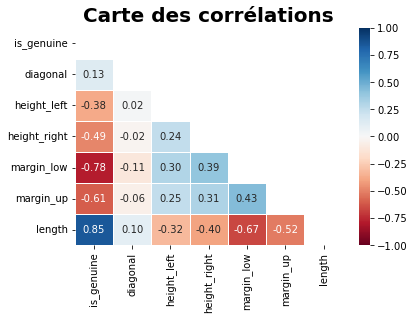

In [21]:
# Heatmap
mask = np.triu(np.ones_like(Billets.corr(), dtype=bool))
sns.heatmap(Billets.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Carte des corr√©lations', fontsize = 20 , fontweight='bold')
plt.show()

In [22]:
Billets.corr()['margin_low']

is_genuine     -0.783032
diagonal       -0.111534
height_left     0.302643
height_right    0.391085
margin_low      1.000000
margin_up       0.431606
length         -0.666753
Name: margin_low, dtype: float64

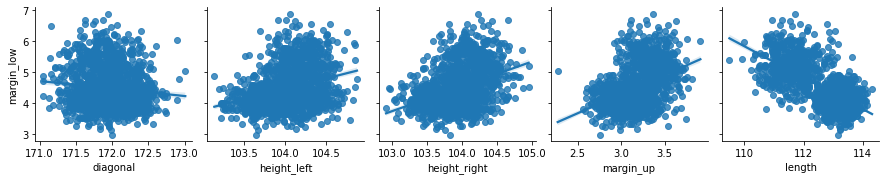

In [23]:
# Visualisation 
sns.pairplot(Billets, x_vars =['diagonal','height_left','height_right','margin_up','length'], y_vars ='margin_low', kind = 'reg')

### <a name="C6">2.3.1.R√©gression sur les donn√©es brutes</a>


In [24]:
# R√©gression lin√©aire √† l‚Äôaide de Scikit-learn. 
# Separation des donn√©es
Billets_regL = Billets.dropna()
Billets_regL_test = Billets.loc[Billets.isnull().any(axis=1)]

# Splitting: Creation de X_train, X_test et y_train :
X_train = Billets_regL[['diagonal','height_left','height_right','margin_up','length']]
y_train = y = Billets_regL['margin_low']
X_test = Billets_regL_test[['diagonal','height_left','height_right','margin_up','length']]
# On instancie 
Linreg= LinearRegression()
# Fit model to training data
Linreg.fit(X_train,y_train)
print(Linreg.intercept_)
print(Linreg.coef_)

# Making predictions
y_pred = Linreg.predict(X_test)


22.994842714447906
[-0.11105978  0.18412242  0.25713805  0.2561879  -0.40910293]


In [25]:
# R√©gression avec statsmodels sur donn√©es brutes
Billets_regL = Billets.dropna()
# R√©gresser margin_low en fonction des autres variables 
reg_multi = smf.ols('margin_low~diagonal + height_left + height_right + margin_up + length', data = Billets_regL).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Sun, 22 Jan 2023   Prob (F-statistic):          2.60e-202
Time:                        17:28:20   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

Non-colin√©arit√© :
L'hypoth√®se de non-colin√©arit√© suppose que les pr√©dicteurs utilis√©s dans la r√©gression ne sont pas corr√©l√©s les uns aux autres.<br>
Si les colonnes de X sont colin√©aires, alors la matrice n'est pas de rang plein, ce qui conduit √† une solution des MCO non unique.<br>

Rappels:<br>
S'il y a colin√©arit√© parfaite, le determinant de la matrice XTX est nul, la matrice a autant de valeurs propres nulles que de relations de colin√©arit√© parfaite.<br>
S'il y a quasi-colin√©arit√© (colin√©arit√©) le d√©terminant de la matrice XTX est proche de 0, la matrice a autant de valeurs propres tr√®s petites que de relations de colin√©arit√©.<br>
Le facteur d'influence de la variance, not√© VIF, de la variable Xj , j‚àà{1,‚Ä¶,p} , est d√©fini par : VIFj=1/(1‚àíR¬≤j).<br>
En pratique, une valeur VIFj>10 indique un probl√®me de colin√©arit√© √©ventuel.

In [26]:
# Matrice de corr√©lation, valeurs propres
corr = np.corrcoef(Billets_regL[['diagonal','height_left','height_right','margin_up','length']], rowvar=0)
w, v = np.linalg.eig(corr)
w

array([2.04129661, 1.0139501 , 0.45603168, 0.78367538, 0.70504623])

In [27]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Billets_regL[["diagonal","height_left","height_right", "margin_up", "length"]].columns
# calculating VIF for each feature
variables = reg_multi.model.exog
vif_data["VIF"] = [variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]
print(vif_data)

        feature       VIF
0      diagonal  1.013613
1   height_left  1.138261
2  height_right  1.230115
3     margin_up  1.404404
4        length  1.576950


<div class="alert alert-block alert-info">
$Test$ $global$<br>
Prob(F-Statistic): L'hypoth√®se nulle du test de Fisher est que tous les coefficients sont nuls( H0:Œ≤2=‚Ä¶=Œ≤p=0 , H1:‚àÉj‚àà{2,‚Ä¶,p}/Œ≤j‚â†0) . Ici, elle est inf√©rieure au seuil alpha 5 % , on rejette l'hypoth√®se nulle, le mod√®le est donc significatif globalement.<br>
    
    
$Test $ $de $ $significativit√© $ $sur$ $ chacune$ $ des $ $variables$ $ explicatives:$<br>
P>|t| : L'hypoth√®se nulle du test de Student est que le coefficients de la variable explicative j est nul (H0:Œ≤j=0 ;H1:Œ≤j‚â†0  pour j‚àà{1,‚Ä¶,p}).les p_values sont tous inf√©rieurs au seuil alpha 5 %, on rejette l'hypoth√®se nulle pour toutes les variables.
On conserve la variable Xj pour j j‚àà{2,‚Ä¶,p} comme explicative (tous les param√®tres sont significatifs).<br>
    
    
$ Coefficient$ $ de$ $ d√©termination$<br>   
R¬≤mesure la part de la variation totale de Y(margin_low) expliqu√©e par le mod√®le de r√©gression sur X.Il vaut environ 0.477, tout comme le R¬≤ ajust√©.Le mod√®le de r√©gression explique 47,7 % de la variation
totale.
 
    
$Intercept$<br>
La valeur d'interception est la valeur moyenne estim√©e de notre variable d√©pendante lorsque toutes nos valeurs de variables ind√©pendantes sont √©gales √† 0. L'intercepte est tr√®s grand d'ou ce message "The condition number is large, 1.94e+05. This might indicate that there are strong multicollinearity or other numerical problems" car le calcul de vif ainsi que le d√©terminant montrent qu'on n'a pas un probl√®me de colin√©arit√©.      
<br>
</div>  

### <a name="C7">2.3.2.R√©gression sur les donn√©es standardis√©es</a>

In [28]:
# Data
Billets_standard = Billets[['diagonal','height_left','height_right',
                                         'margin_low','margin_up','length']]
# Standardisation
features = Billets_standard.columns # Enregister les colonnes dans une variable nomm√©e features
# On instancie
scaler = StandardScaler()
# On fit
scaler.fit(Billets_standard)
# On transforme
Billets_standard = scaler.transform(Billets_standard)
Billets_standard = pd.DataFrame(Billets_standard)
Billets_standard.columns = features
df_standard = Billets_standard.dropna()
df_manquante = Billets_standard.loc[Billets_standard['margin_low'].isnull()]
# R√©gresser margin_low en fonction des autres variables 
reg_multi = smf.ols('margin_low~diagonal + height_left + height_right + margin_up + length', data = df_standard).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Sun, 22 Jan 2023   Prob (F-statistic):          2.60e-202
Time:                        17:28:26   Log-Likelihood:                -1601.3
No. Observations:                1463   AIC:                             3215.
Df Residuals:                    1457   BIC:                             3246.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0038      0.019     -0.198   

### <a name="C8">2.3.3 V√©rification des hypoth√®ses </a>
Nous allons ici r√©aliser les tests √† un niveau  ùõº = 5 % :
### Normalit√© de la distribution des r√©sidus
L'hypoth√®se gaussienne consiste √† consid√©rer que œµ suit une loi normale N(0,œÉ2)<br>
La loi normale nous permettra notamment de tester la significativit√© des param√®tres.<br>
Pour tester la normalit√© des r√©sidus, on peut faire un test de Shapiro-Wilk.<br>

In [29]:
# Normalite:
# Hypoth√®se nulle H0: l‚Äô√©chantillon est issu d‚Äôune population normalement distribu√©e.
# Hypoth√®se H1: l‚Äô√©chantillon n'est pas issu d‚Äôune population normalement distribu√©e.
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9857879281044006, pvalue=8.536943374437556e-11)

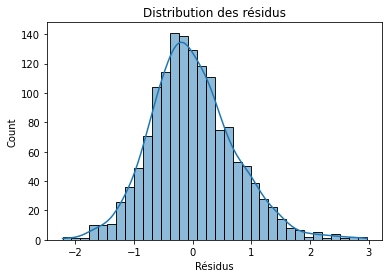

In [30]:
# Graphique:
sns.histplot(reg_multi.resid, kde=True)
plt.xlabel("R√©sidus")
plt.title("Distribution des r√©sidus")
plt.show()

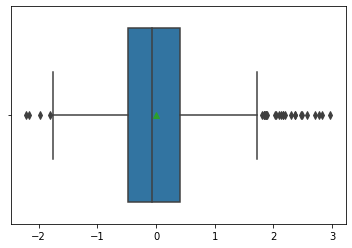

In [31]:
# Boxplot
sns.boxplot(x = reg_multi.resid, showmeans=True);

L'allure de l'histogramme est assez classique : centr√©e et √† peu pr√®s sym√©trique.
Le boxplot montre une distribution raisonnable avec la moyenne proche de la m√©diane (indiquant la sym√©trie).

<div class="alert alert-block alert-info">
Une p-value inf√©rieure √† alpha pour le test de Shapiro-Wilk indique que l'hypoth√®se nulle de normalit√© de la distribution des r√©sidus est rejet√©e.<br>
N√©anmoins, l'observation des r√©sidus, le fait qu'ils ne soient pas tr√®s diff√©rents d'une distribution sym√©trique, et le fait que l'√©chantillon soit de taille suffisante (sup√©rieure √† 30) permettent de dire que les r√©sultats obtenus par le mod√®le lin√©aire gaussien ne sont pas absurdes, m√™me si le r√©sidu n'est pas consid√©r√© comme √©tant gaussien.
</div>  


### Homosc√©dasticit√© : 
Var(Œµi)=œÉ2  (leur variance est constante et √©gale √† œÉ2 ) <br>
Les variances des r√©sidus doivent √™tre constantes. Les tests de Breusch-Pagan et de White permettent de tester l'hypoth√®se d'homosc√©dasticit√© du terme d'erreur d'un mod√®le de r√©gression lin√©aire.<br>
(H0): Homosc√©dasticit√©: (les r√©sidus sont dispers√©s al√©atoirement, la variance d'un individu √† un autre est constante.<br>
(Ha): h√©t√©rosc√©dasticit√©<br> 
        

In [32]:
# Perform a Breusch-Pagan test.
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(reg_multi.resid, reg_multi.model.exog)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 7.759535216180973e-16


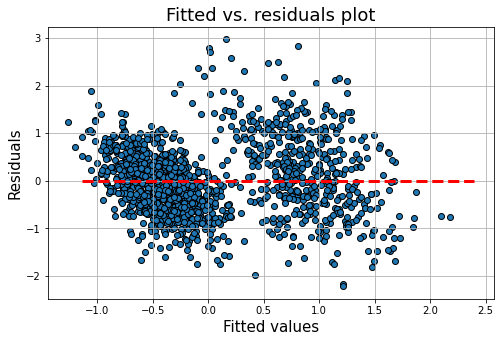

In [33]:
# Fitted vs. residuals
plt.figure(figsize=(8,5))
p=plt.scatter(x=reg_multi.fittedvalues,y=reg_multi.resid,edgecolor='k')
xmin=min(reg_multi.fittedvalues)
xmax = max(reg_multi.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Homosc√©dasticit√©')

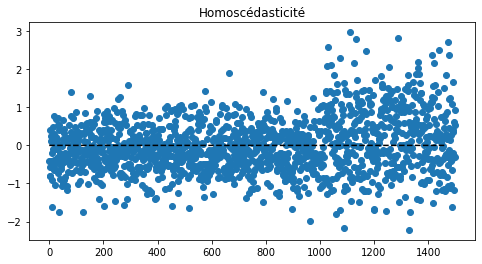

In [34]:
# Graphique:
plt.subplots(figsize=(8, 4))
plt.scatter(df_standard.index, y=reg_multi.resid)
plt.plot(np.repeat(0, len(df_standard.index)+2), color="black", linestyle='--')
plt.title("Homosc√©dasticit√©")

The fitted vs. residuals plot shows violation of the constant variance assumption - Heteroscedasticity.


 </div> <div class="alert alert-block alert-warning">La p-valeur ici est inf√©rieure √† $5$%, on rejette l'hypoth√®se $H0$ selon laquelle les variances sont constantes (l'hypoth√®se d‚Äôhomosc√©dasticit√©).
La visualisation graphique des r√©sidus studentis√©s montre un nuage avec une forme conique peut laisser pr√©sager un effet h√©t√©rosc√©dastique..<b>

### √âvaluation de l‚Äôhypoth√®se de l‚Äôind√©pendance des r√©sidus (auto-corr√©lation)

Cov(Œµi,Œµj)=0 si i‚â†j (elles n'ont pas de d√©pendance lin√©aire)<br>
Le test de Durbin-Watson est le plus souvent utilis√©.<br> 
H0 : l'ind√©pendance <br>
H1 :les r√©sidus sont non-ind√©pendants.<br>

In [35]:
# Le test de Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
# Durbin-Watson test
print(durbin_watson(reg_multi.resid))

1.8927631665241555


S'il n'y a pas d'autocorr√©lation, la valeur doit √™tre centr√©e autour de 2.
Plus on se rapproche de 0, plus les autocorr√©lations sont n√©gatives.
Plus on se rapproche de 4, plus les autocorr√©lations sont positives.
On peut admettre de rejeter les autocorr√©lations si la valeur rendue est entre 1.5 et 2.5.

<div class="alert alert-block alert-info">
Il n'y a donc pas d'autocorr√©lation. Les r√©sidus sont ind√©pendantes.
</div> 

### Non-colin√©arit√© : 

In [36]:
# Matrice de corr√©lation, valeurs propres
corr = np.corrcoef(df_standard[['diagonal','height_left','height_right','margin_up','length']], rowvar=0)
w, v = np.linalg.eig(corr)
w

array([2.04129661, 1.0139501 , 0.45603168, 0.78367538, 0.70504623])

In [37]:
# Determinant
d = np.linalg.det(corr)
print(d)

0.5215206485383336


In [38]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_standard[["diagonal","height_left","height_right", "margin_up", "length"]].columns
# calculating VIF for each feature
variables = reg_multi.model.exog
vif_data["VIF"] = [variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]
print(vif_data)

        feature       VIF
0      diagonal  1.013613
1   height_left  1.138261
2  height_right  1.230115
3     margin_up  1.404404
4        length  1.576950


Tous les VIF sont inf√©rieurs √† 10, il n'y a donc pas de probl√®me de colin√©arit√© parfaite.
Si l'hypoth√®se de non-colin√©arit√© n'est pas v√©rifi√©e, l'estimation du mod√®le est impossible.

### <a name="C9">2.3.4 Identification des individus atypiques et influents </a>


Nous allons mener des analyses sur les valeurs atypiques et/ou influentes en travaillant sur un dataframe appel√©  analyses.
R√©cup√©rons $n$, le nombre d'individus de l'√©chantillon, et $p$, le nombre de variables.

In [39]:
alpha = 0.05
n = df_standard.shape[0]
p = 6
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
#analyses['obs'].astype('float', inplace=True) 

#### Analysez l'atypicit√© des observations
##### Sur les variables explicatives :
Calculez les leviers:

La matrice de projection sur le sous-espace vectoriel engendr√© par les colonnes de X est commun√©ment not√©e H
Les termes diagonaux de H sont appel√©s "leviers des observations".
Leverage : Effet de levier : Dans les statistiques et en particulier dans l'analyse de r√©gression, l'effet de levier est une mesure de la distance qui s√©pare les valeurs des variables ind√©pendantes d'une observation de celles des autres observations.
On peut calculer les leviers comme ceci, en sachant que le seuil des leviers est de $2‚àó\frac{p}{n}$.

In [40]:
analyses['levier'] = reg_multi.get_influence().hat_matrix_diag

seuil_levier = 2*p/n


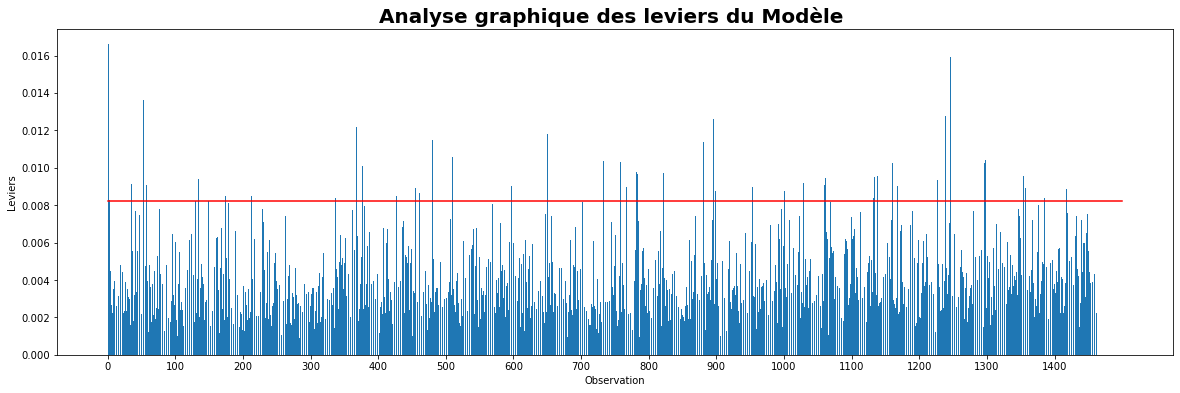

In [41]:
# Graphique:
plt.figure(figsize=(20,6))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_levier, seuil_levier], color='r')
plt.title('Analyse graphique des leviers du Mod√®le ', fontsize=20, fontweight='bold')
plt.show()

Pour s√©lectionner les points pour lesquels le levier est sup√©rieur au seuil, on ex√©cute la ligne suivante :

In [42]:
analyses.loc[analyses['levier'] > seuil_levier, :].shape

(75, 2)

#### Sur la variable √† expliquer :
##### Calculez les r√©sidus studentis√©s

Si l'on souhaite maintenant calculer les r√©sidus studentis√©s, nous √©crivons ceci, sachant que le seuil pour les r√©sidus studentis√©s est une loi de Student √† n-p-1 degr√©s de libert√© :

In [43]:
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

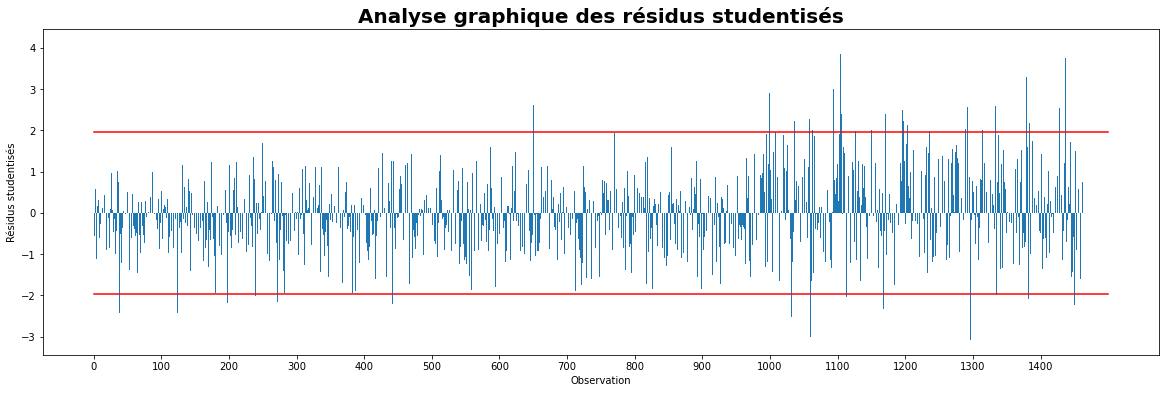

In [44]:
# Graphique:
plt.figure(figsize=(20,6))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('R√©sidus studentis√©s')
plt.plot([0, 1500], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1500], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.title('Analyse graphique des r√©sidus studentis√©s', fontsize=20, fontweight='bold')
plt.show()

In [45]:
analyses[(analyses['rstudent'] > seuil_rstudent) | (analyses['rstudent']  < -seuil_rstudent)]

obs    levier  rstudent
10      11  0.002030 -2.221047
37      38  0.001798 -2.426466
123    124  0.006449 -2.414722
197    198  0.002204 -2.189564
238    239  0.006155 -2.018889
...    ...       ...       ...
1427  1428  0.003757  2.548894
1436  1437  0.001505  3.741140
1441  1442  0.009325  3.280337
1449  1450  0.005530 -2.232347
1453  1454  0.003275  2.285591

[78 rows x 3 columns]

#### Analysez l'influence des observations
#### D√©terminez la distance de Cook

Pour trouver la distance de Cook, nous ex√©cutons ceci :

In [46]:
influence = reg_multi.get_influence().summary_frame()

In [47]:
analyses['dcooks'] = influence['cooks_d']
# Seuil (threshold), toutes valeurs au dessus aura une forte influence
seuil_dcook = 4/(n-p)  
print(round(seuil_dcook,5))

0.00275


On peut d√©tecter les observations influentes comme ceci :

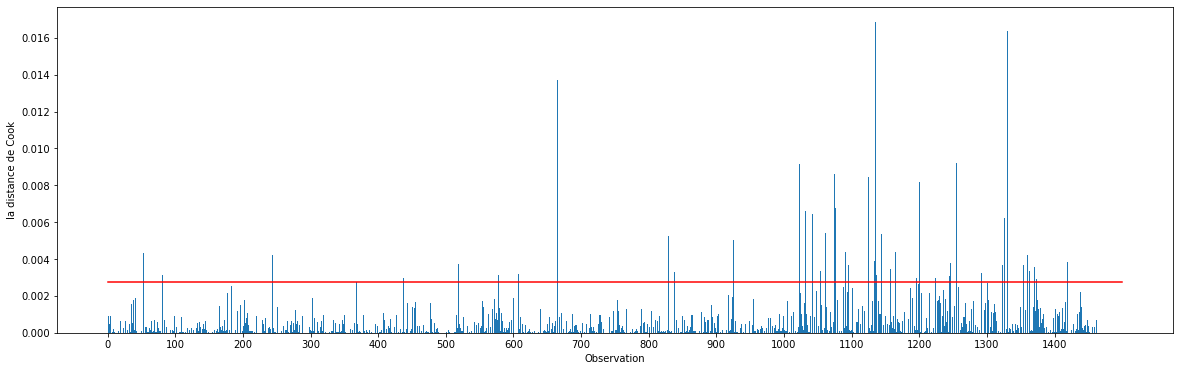

In [48]:
# Graphique:
plt.figure(figsize=(20,6))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('la distance de Cook')
plt.plot([0, 1500], [seuil_dcook, seuil_dcook], color='r')
plt.show()

In [49]:
ObsInfluente = analyses.loc[ analyses['dcooks'] > seuil_dcook, :]
ObsInfluente.shape

(79, 4)

In [50]:
# Find number of observations which are BOTH outlier and highly influential
extreme = analyses[(analyses['dcooks'] > seuil_dcook) & 
                       (abs(analyses['rstudent']) >  seuil_rstudent)]
prop_extreme = round(100*(len(extreme) / n),1)
print(f'Proportion of highly influential outliers = {prop_extreme}%')


Proportion of highly influential outliers = 0.3%


In [51]:
# Display most influential outliers
extreme.sort_values("dcooks", ascending=False)

obs    levier  rstudent    dcooks
1441  1442  0.009325  3.280337  0.009596
1031  1032  0.005115 -2.510481  0.006603
1321  1322  0.001112  2.582140  0.003448
1291  1292  0.005626  2.564383  0.003240
1195  1196  0.001681  2.504636  0.002971

In [52]:
# Predictions et imputation des valeurs manquantes
df_standard = Billets_standard.dropna()
df_manquante = Billets_standard.loc[Billets_standard['margin_low'].isnull()]
predict_nan = reg_multi.predict(df_manquante)
for i in predict_nan.index:
    Billets_standard.iloc[i, 3] = predict_nan[i]
# v√©rification    
Billets_standard.isna().sum()  

diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [53]:
# data
billetsS= Billets_standard.copy(deep=True)
billetsS['is_genuine'] = Billets['is_genuine']

## <a name="C10">3.Outliers </a>

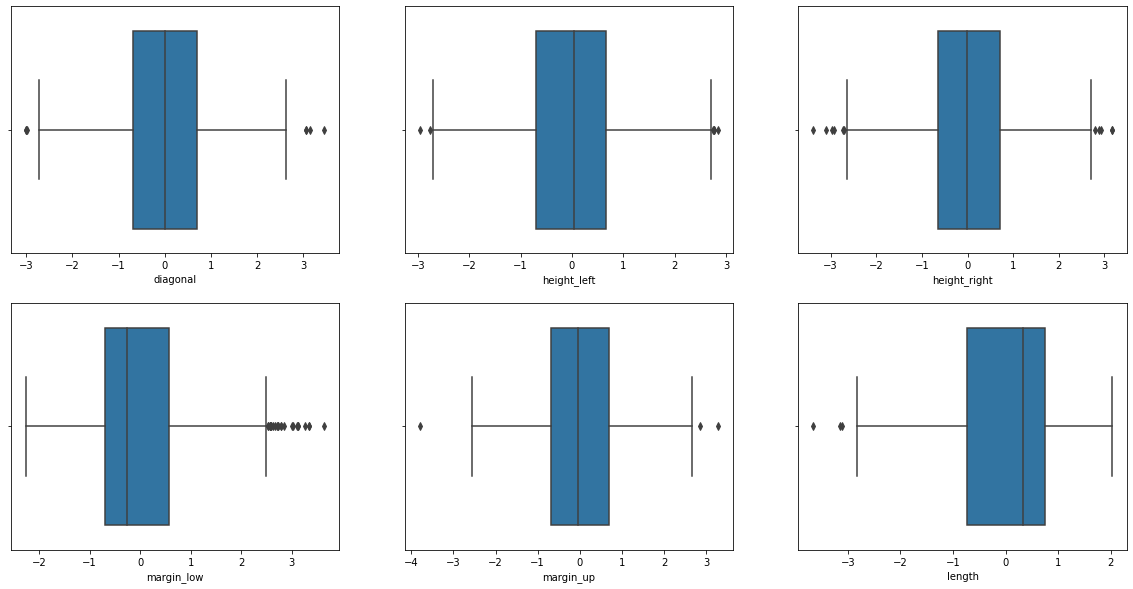

In [54]:
# Representation graphique des outliers:
a = 2  # nombre de lignes
b = 3  # nombre de colonnes
c = 1  # initialisation

fig = plt.figure(figsize=(20,10))

for i in billetsS.loc[:, billetsS.columns != "is_genuine"]:
    plt.subplot(a, b, c)
    #plt.title
    plt.xlabel(i)
    sns.boxplot(x = billetsS[i])
    c = c + 1
plt.show()

In [55]:
# Detection numerique des outliers:
# Identification des outliers unidimentionnels
List_col = np.array(billetsS.columns)
List_col = np.delete(List_col,6)
allOutliers = []
for element in List_col:
    outliers = []
    q1 = np.quantile(billetsS[element], 0.25)
    q3 = np.quantile(billetsS[element], 0.75)
    iqr = q3-q1
    limite_sup = q3+(1.5*iqr)
    limite_inf = q1-(1.5*iqr)
    outliersByElement = billetsS.loc[(billetsS[element] <= limite_inf) | (billetsS[element] >= limite_sup)].index
    for outlierByElement in outliersByElement:
        outliers.append(outlierByElement)
        if outlierByElement not in allOutliers:
            allOutliers.append(outlierByElement)
    print("============================================================================================================")
    print("Les outliers pour l'√©l√©ment ",element,'sont :')
    print(outliers)
print("============================================================================================================")
print("============================================================================================================")
print("============================================================================================================")
print("La liste de tous les outliers est", allOutliers)
print("============================================================================================================")
print("Le nombre de outliers unidimensionnels est", len(allOutliers))


Les outliers pour l'√©l√©ment  diagonal sont :
[729, 828, 842, 1022, 1142, 1277, 1388]
Les outliers pour l'√©l√©ment  height_left sont :
[0, 224, 292, 1090, 1150, 1382]
Les outliers pour l'√©l√©ment  height_right sont :
[0, 77, 176, 193, 251, 522, 761, 1199, 1321, 1331, 1484]
Les outliers pour l'√©l√©ment  margin_low sont :
[1023, 1027, 1031, 1041, 1053, 1075, 1092, 1110, 1124, 1133, 1134, 1169, 1254, 1290, 1322, 1345, 1348, 1353, 1420, 1426, 1441, 1459, 1464, 1473]
Les outliers pour l'√©l√©ment  margin_up sont :
[664, 1029, 1270]
Les outliers pour l'√©l√©ment  length sont :
[1082, 1355, 1453]
La liste de tous les outliers est [729, 828, 842, 1022, 1142, 1277, 1388, 0, 224, 292, 1090, 1150, 1382, 77, 176, 193, 251, 522, 761, 1199, 1321, 1331, 1484, 1023, 1027, 1031, 1041, 1053, 1075, 1092, 1110, 1124, 1133, 1134, 1169, 1254, 1290, 1322, 1345, 1348, 1353, 1420, 1426, 1441, 1459, 1464, 1473, 664, 1029, 1270, 1082, 1355, 1453]
Le nombre de outliers unidimensionnels est 53


## **Partie 2: Analyse descriptive des donn√©es**
## <a name="C11">1.Analyse univari√©e </a>

### Variables qualitatives

In [56]:
# Nombre de vrais et faux billets
billetsS['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

Text(0.5, 1.0, 'R√©partition des billets')

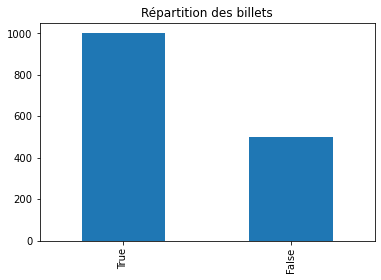

In [57]:
# Diagramme en bar
billetsS['is_genuine'].value_counts().plot(kind='bar')
plt.title("R√©partition des billets")

In [58]:
rp.summary_cat(billetsS[['is_genuine']])

Variable  Outcome  Count  Percent
0  is_genuine     True   1000    66.67
1                False    500    33.33

### Variables quantitatives

In [59]:
# Les mesures de tendance centrale
Data= Billets.drop(columns= 'is_genuine')
colonnes = Data.columns.tolist()
for variable in colonnes:
    print('les mesures de tendences centrale de la variable', variable)
    print('la moyenne de la variable', variable, round(Billets[variable].mean(),2))
    print('la mediane de la variable', variable, round(Billets[variable].median(),2))
    print('les modes de la variable', variable, round(Billets[variable].mode(),2))
    print('====================================================================')

les mesures de tendences centrale de la variable diagonal
la moyenne de la variable diagonal 171.96
la mediane de la variable diagonal 171.96
les modes de la variable diagonal 0    171.99
Name: diagonal, dtype: float64
les mesures de tendences centrale de la variable height_left
la moyenne de la variable height_left 104.03
la mediane de la variable height_left 104.04
les modes de la variable height_left 0    103.95
Name: height_left, dtype: float64
les mesures de tendences centrale de la variable height_right
la moyenne de la variable height_right 103.92
la mediane de la variable height_right 103.92
les modes de la variable height_right 0    103.76
Name: height_right, dtype: float64
les mesures de tendences centrale de la variable margin_low
la moyenne de la variable margin_low 4.49
la mediane de la variable margin_low 4.31
les modes de la variable margin_low 0    4.08
1    4.10
2    4.18
Name: margin_low, dtype: float64
les mesures de tendences centrale de la variable margin_up
la moy

In [60]:
# Les mesures de dispersion
colonnes = Billets.columns.tolist()
for variable in colonnes:
    print('La variace empirique de la variable', variable, 'est:', round(Billets[variable].var(),3))
    print("L'√©cart-type empirique de la variable", variable, 'est', round(Billets[variable].std(),3))
    print('====================================================================')

La variace empirique de la variable is_genuine est: 0.222
L'√©cart-type empirique de la variable is_genuine est 0.472
La variace empirique de la variable diagonal est: 0.093
L'√©cart-type empirique de la variable diagonal est 0.305
La variace empirique de la variable height_left est: 0.09
L'√©cart-type empirique de la variable height_left est 0.299
La variace empirique de la variable height_right est: 0.106
L'√©cart-type empirique de la variable height_right est 0.326
La variace empirique de la variable margin_low est: 0.441
L'√©cart-type empirique de la variable margin_low est 0.664
La variace empirique de la variable margin_up est: 0.054
L'√©cart-type empirique de la variable margin_up est 0.232
La variace empirique de la variable length est: 0.762
L'√©cart-type empirique de la variable length est 0.873


In [61]:
# Les mesures de forme
colonnes = Billets.columns.tolist()
for variable in colonnes:
    print('Le skewness de la variable', variable, 'est', round(Billets[variable].skew(),2))
    print('Le kurtosis de la variable', variable, 'est', round(Billets[variable].kurtosis(),2))
    print('====================================================================')

Le skewness de la variable is_genuine est -0.71
Le kurtosis de la variable is_genuine est -1.5
Le skewness de la variable diagonal est -0.03
Le kurtosis de la variable diagonal est -0.13
Le skewness de la variable height_left est -0.09
Le kurtosis de la variable height_left est -0.2
Le skewness de la variable height_right est -0.0
Le kurtosis de la variable height_right est -0.03
Le skewness de la variable margin_low est 0.86
Le kurtosis de la variable margin_low est 0.22
Le skewness de la variable margin_up est 0.15
Le kurtosis de la variable margin_up est -0.25
Le skewness de la variable length est -0.82
Le kurtosis de la variable length est -0.28


array([[<AxesSubplot:title={'center':'diagonal'}>,
        <AxesSubplot:title={'center':'height_left'}>,
        <AxesSubplot:title={'center':'height_right'}>],
       [<AxesSubplot:title={'center':'margin_low'}>,
        <AxesSubplot:title={'center':'margin_up'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

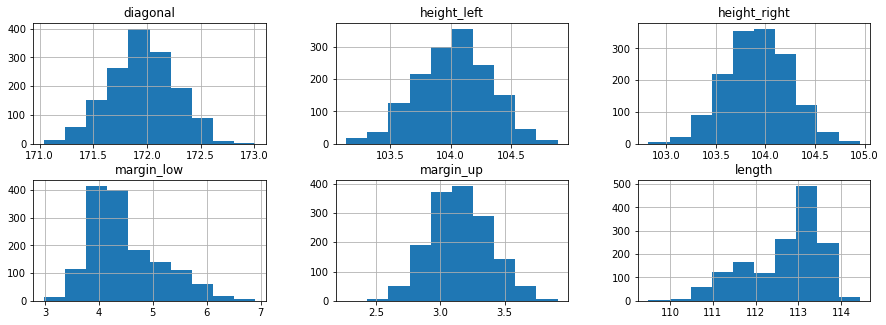

In [62]:
# La r√©partition des dimensions des billets
# Visualiser la distribution des fr√©quences
Billets.hist(layout= (3,3), figsize = (15,8))

## <a name="C12">2.Analyse multivari√©e </a>

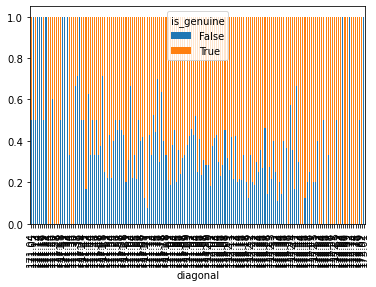

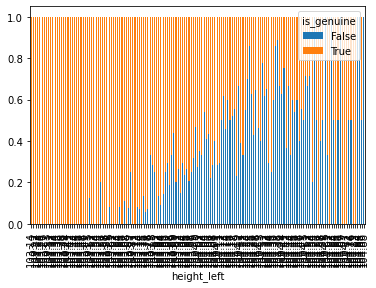

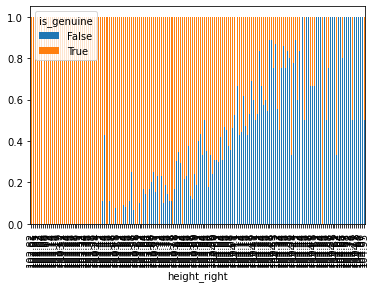

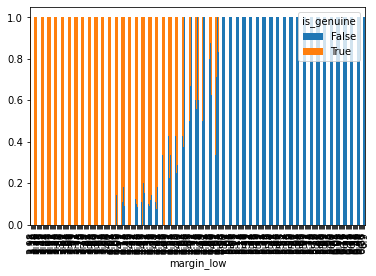

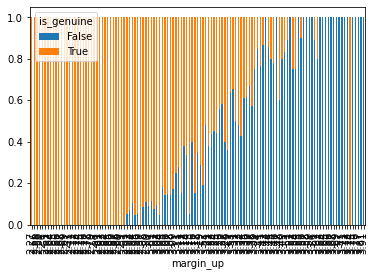

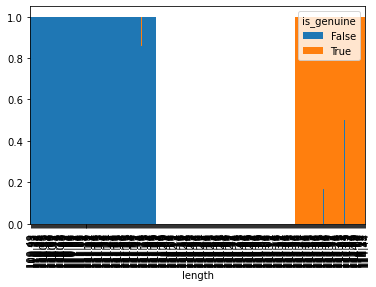

In [63]:
variable_list = ['diagonal','height_left','height_right','margin_low','margin_up','length']
for variable in variable_list:
    table = pd.crosstab(Billets[variable],Billets.is_genuine)
    table.div(table.sum(1).astype(float),axis =0).plot(kind = 'bar',stacked = True)



<div class="alert alert-block alert-info">
Ces graphiques montrent que la variable length permet de s√©parer compl√©tement les billets en faux et vrais billets.<br>
La variable margin_low permet aussi la s√©paration des billets, il y a une petite zone de confusion ou pour la m√™me valeur de margin_low on trouve des faux et vrais billets.<br>
La variable 'diagonal' ne permet pas l‚Äôidentification des billets, pour une m√™me valeur on trouve des faux et de vrais.<br>
</div>  

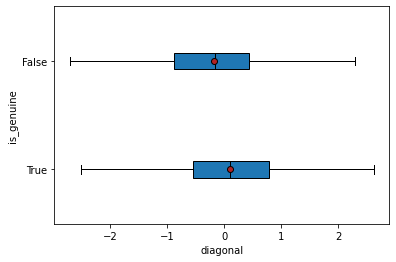

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


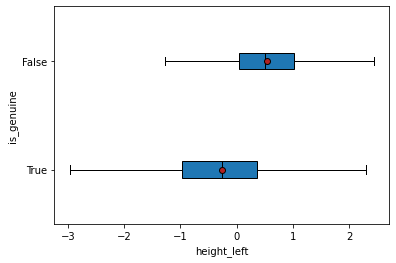

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


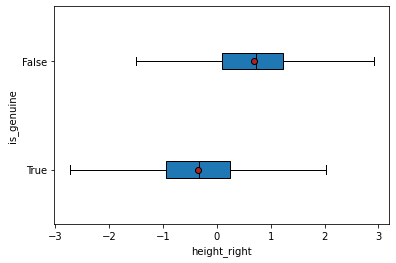

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


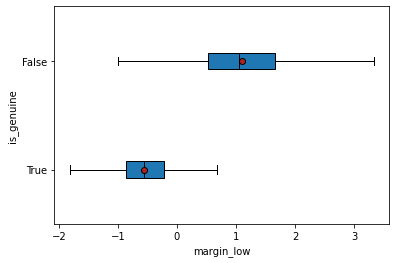

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


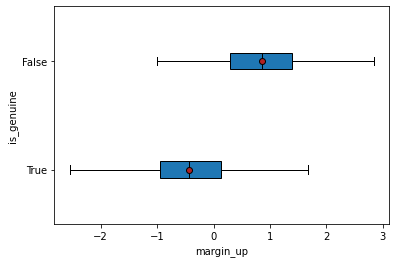

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


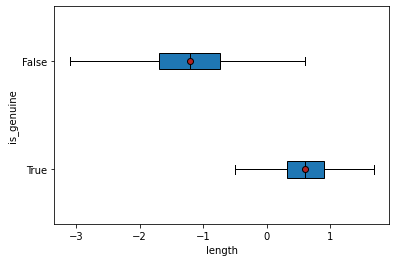

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [64]:

# Visualisation
variable_list = ['diagonal','height_left','height_right','margin_low','margin_up','length']
for variable in variable_list:
    X = 'is_genuine' # qualitative
    Y = variable # quantitative
    modalites = billetsS['is_genuine'].unique()
    groupes = []
    for m in modalites:
        groupes.append(billetsS[billetsS['is_genuine'] == m][Y])

    # Propri√©t√©s graphiques    
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
    plt.boxplot(groupes,labels = modalites,  showfliers = False, medianprops = medianprops, 
            vert = False, patch_artist = True, showmeans= True, meanprops = meanprops)
    plt.xlabel(variable)
    plt.ylabel('is_genuine')
    plt.show()
    print("-"*100)
    print("-"*100)

<div class="alert alert-block alert-info">
Il semble qu'il n'y a pas une grande diff√©rence entre les moyennes de deux groupes de billets pour les variables diagonal et height_left. Ces variables ne permettent pas apparemment de bien partitionner les faux de vrais billets.<br>
Il semble que les moyennes de groupes pour les autres variables sont diff√©rentes.<br>
</div>  

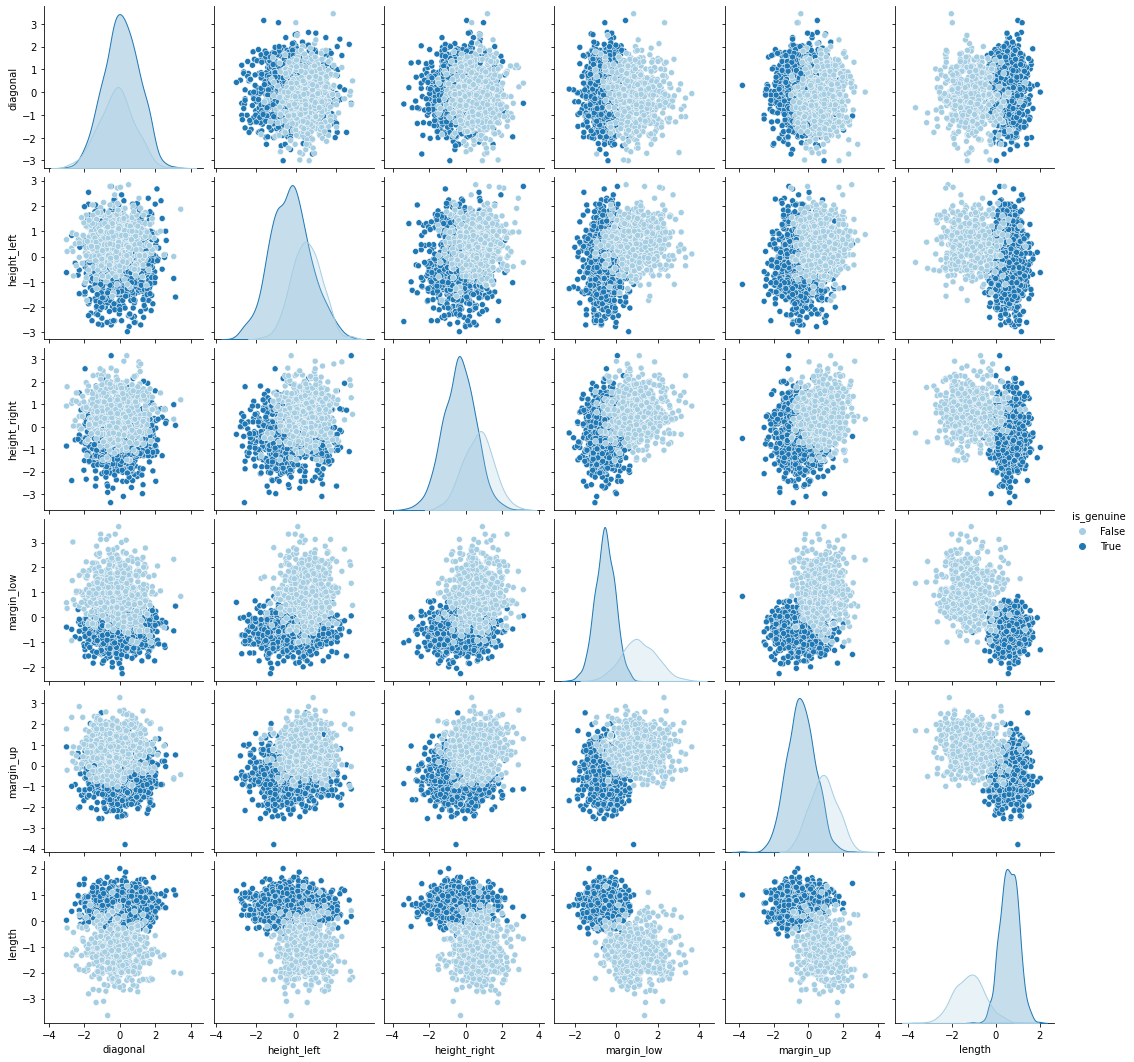

In [65]:
# Pair plot:
sns.pairplot(billetsS, hue="is_genuine", palette="Paired")

Les dimensions qui permettent vraiment de distinguer les vrais des faux billets sont length et margin_low. (On peut distinguer deux classes bien s√©par√©es). 

## <a name="C13">3.Analyse en composantes principales </a> 

### Tester statistiquement si la compression des variables est pertinente

In [66]:
# hypoth√®se nulle : orthogonalit√© des variables
# hypoth√®se alternative : les variables sont corr√©l√©es
R = billetsS[['diagonal','height_left','height_right','margin_low','margin_up','length']].corr()
# Mise en ≈ìuvre du test de sph√©ricit√©  de Bartlett
n= billetsS[['diagonal','height_left','height_right','margin_low','margin_up','length']].shape[0]
p= billetsS[['diagonal','height_left','height_right','margin_low','margin_up','length']].shape[1]
Khi2= -(n-1-(2*p+5)/6)*mt.log(np.linalg.det(R))
ddl= p*(p-1)/2
P_valeur = chi2.pdf(Khi2,ddl)
print(P_valeur<0.01)

True


### Data

In [67]:
XACP = billetsS.copy(deep=True)
XACP = XACP[['diagonal','height_left','height_right','margin_low','margin_up','length']]

### ACP

In [68]:
#ACP
# les composantes
n_components = 6
# On instancie notre ACP
pca = PCA(n_components = n_components)
# On l'entraine 
pca.fit(XACP)

PCA(n_components=6)

### Explained variance & scree plot

In [69]:
# La variance capt√©e par chaque nouvelle composante.
pca.explained_variance_ratio_
# Enregister cela dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
# La somme cumul√©e de la variance
scree_cum = scree.cumsum().round()
scree_cum

array([ 43.,  60.,  73.,  85.,  95., 100.])

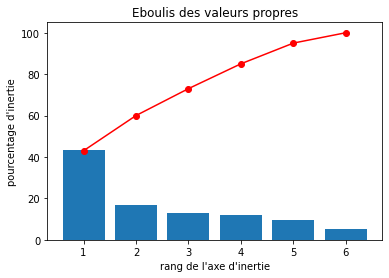

In [70]:
# La liste des composantes
x_list = range(1, n_components+1)
# Affichage
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

### Les composantes

In [71]:
# Choix de nombre de composantes
n_components = 2
pca = PCA(n_components = n_components)
pca.fit(XACP)
# La liste des composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2]

In [72]:
# Corr√©lations  entre les variables initiales et les variables synth√©tiques
pcs = pca.components_
# Version pandas
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

diagonal  height_left  height_right  margin_low  margin_up  length
F1     -0.08         0.33          0.39        0.50       0.44   -0.53
F2      0.94         0.31          0.11       -0.07      -0.01    0.05

<AxesSubplot:>

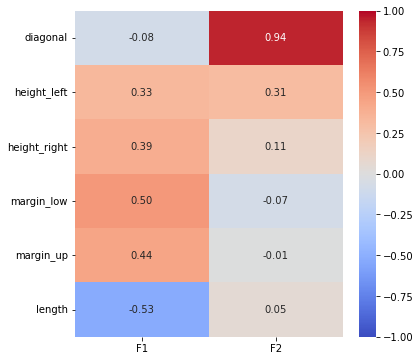

In [73]:
# Repr√©sentation plus visuelle des corr√©lations
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [74]:
# Fonction pour visualiser le cercle de corr√©lations
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a √©t√© fit
    x_y : list ou tuple : le couple x,y des plans √† afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) √† repr√©senter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(8, 8))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les fl√®ches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] ,
                pca.components_[y, i] ,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqu√©
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corr√©lations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

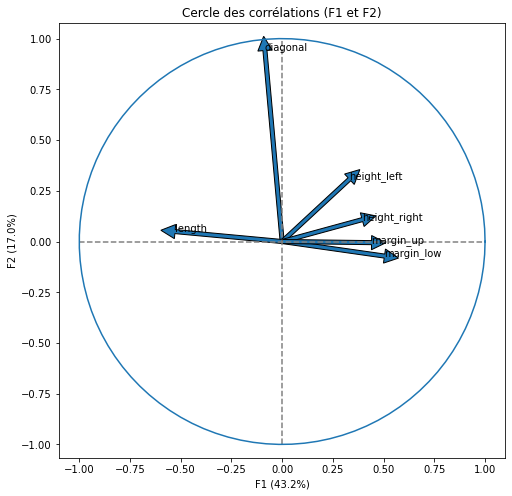

In [75]:
# Visualisation de corr√©lations sur le premier plan factoriel
x_y = (0,1)
correlation_graph(pca, x_y, features)

<div class="alert alert-block alert-info">
F1 synth√©tise notamment les variables length, margin_low et margin_up.<br>
F2 synth√©tise la dimension diagonale.
</div>  

### Projection

In [76]:
# Les coordonn√©es des individus dans le nouvel espace 
X_proj = pca.transform(XACP)
X_proj[:5]

array([[ 1.64838016,  0.74508932],
       [-2.01692351, -2.20684806],
       [-0.97065754,  2.62158881],
       [-1.37056781, -1.81953473],
       [ 0.15431648, -0.56827285]])

In [77]:
# Fonction Visualise la projection de individus 
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=None, 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projet√©s
    x_y : list ou tuple : le couple x,y des plans √† afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a √©t√© fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus √† projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : param√®tre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui d√©finit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilis√© pour repr√©senter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)
    
    # On d√©finit la forme de la figure si elle n'a pas √©t√© donn√©e
    if not figsize: 
        figsize = (7,6)

    # On v√©rifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demand√©es")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On d√©finit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels √† X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker)
        
    # Si la variable pca a √©t√© fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqu√©
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='black', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='black', alpha=0.8)

    country_coor = []
    


    # Affichage des labels des points
    if labels is not None:  
        for i,(_x,_y) in enumerate(X_projected[:,[x,y]]):
            plt.text(_x, _y, labels[i], fontsize='14', ha='center',va='center') 

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None: 
        plt.legend()
    plt.show()

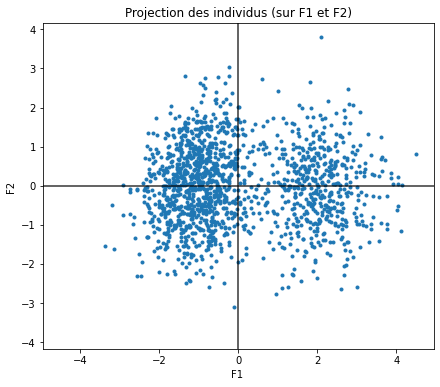

In [78]:
# Affichage de la projection des individus sur le plan(F1,F2)
x_y = (0,1)
display_factorial_planes(X_proj, x_y)

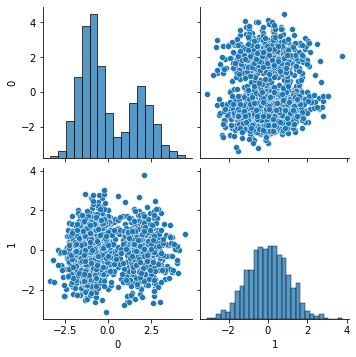

In [79]:
X_proj = pd.DataFrame(X_proj)
sns.pairplot(X_proj)

<div class="alert alert-block alert-info">
On observe tr√®s bien que la composante F1 permet de distinguer les faux de vrais billets.<br>
Ainsi la variable length, margin_low et margin_up sont les plus cens√©es √† classifier les billets en faux et vrais.
</div>  

## **Partie3: Identification des contrefa√ßons des billets**
## <a name="C14">1.Identification des contrefa√ßons par la m√©thode K-means</a> 

In [80]:
def confusion(y_test, y_predected) :
    """display a confusion matrix"""
    mat = confusion_matrix(y_test, y_predected)
    mat = pd.DataFrame(mat)
    mat.index = [f"test_{i}" for i in mat.index]
    return mat

#### Classification des billets par K-means et √©valuation du mod√®le

Performances
accuracy_score: 0.9766666666666667
              precision    recall  f1-score   support

 class False       0.97      0.96      0.97       105
  class True       0.98      0.98      0.98       195

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.98      0.98      0.98       300



Text(0.5, 1.0, 'Matrice de confusion K-means\n')

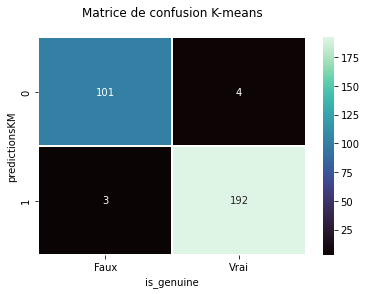

In [83]:
# Pr√©parer les donn√©es d‚Äôentrainement
X = billetsS.iloc[:,:6]
y = billetsS.iloc[:,6]

# Division de la base de donn√©es
X_trainKM, X_testKM, y_trainKM, y_testKM = train_test_split(X, y, test_size=0.2, random_state=45)

# Cr√©ation du mod√®le
model_kmeans = KMeans(n_clusters= 2,random_state=100 )

# On entraine
model_kmeans.fit(X_trainKM)

# Test model 
predictionsKM = model_kmeans.predict(X_testKM)

# Une condition pour forcer de donner 1 pour un vrai billet et 0 pour un faux (une solution de contournement)
Df = pd.DataFrame()
Df["predictionsKM"] = predictionsKM
if len(Df.loc[Df["predictionsKM"]== 0])>= len(Df.loc[Df["predictionsKM"]== 1]):
    Df["predictionsKM"]=Df["predictionsKM"].map({1:0, 0:1})
predictionsKM = Df["predictionsKM"]
Df["is_genuine"] = np.array(y_testKM).astype('str')
Df["is_genuine"] = Df["is_genuine"].map({'False':0, 'True':1})

# Evaluation de la classification par la m√©thode K-means
# matrice de confusion
Mat_confusion = confusion(y_testKM, predictionsKM)

# Performances
print('Performances')
print('===============================================================')
print('accuracy_score:',accuracy_score(y_testKM, predictionsKM))
print('===============================================================')
target_names = ['class False', 'class True']
print(classification_report(Df['is_genuine'],Df["predictionsKM"], target_names=target_names))
print('===============================================================')

# Graphique:
sns.heatmap(Mat_confusion,
            annot = True,
            fmt = ".3g", 
            cmap = sns.color_palette("mako", as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["0","1"]
            )
plt.xlabel("is_genuine")
plt.ylabel("predictionsKM")
plt.title("Matrice de confusion K-means\n")

#### Visualisation de la partition pr√©dite et de la vraie partition

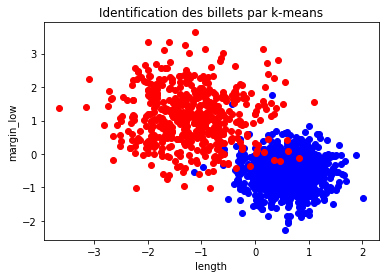

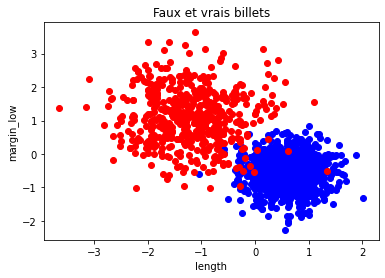

In [84]:

## Visualisation de la classification par K-means
billets_kmeans = billetsS.copy(deep = True)
model_kmeans.fit(X)
billets_kmeans['pr√©diction'] = model_kmeans.labels_
if len(billets_kmeans.loc[billets_kmeans["pr√©diction"]== 0])>= len(billets_kmeans.loc[billets_kmeans["pr√©diction"]== 1]):
    billets_kmeans["pr√©diction"] = billets_kmeans["pr√©diction"].map({1:0, 0:1})
df1 = billets_kmeans[billets_kmeans['pr√©diction'] == 1]# DataFrame de billets pr√©dits comme vrais billets
df2 = billets_kmeans[billets_kmeans['pr√©diction'] == 0]# DataFrame de billets pr√©dits comme faux billets
# Plot
plt.scatter(df1['length'], df1['margin_low'], color='blue',  label='True')
plt.scatter(df2['length'], df2['margin_low'], color= 'red', label='False')

plt.xlabel('length')
plt.ylabel('margin_low')
plt.title('Identification des billets par k-means')
plt.show()
## Visualisation de la vrai classification
df3 = billetsS[billetsS['is_genuine'] == True] # DataFrame de vrais billets
df4 = billetsS[billetsS['is_genuine'] == False]# DataFrame de faux billets
# Plot
plt.scatter(df3['length'], df3['margin_low'], color='blue',  label='True')
plt.scatter(df4['length'], df4['margin_low'], color= 'red', label='False')

plt.xlabel('length')
plt.ylabel('margin_low')
plt.title('Faux et vrais billets')
plt.show()

## <a name="C15">2. Classification par l‚Äôalgorithme K Nearest Neighbors Knn</a> 

L‚Äôalgorithme K Nearest Neighbors (K-NN) est un algorithme d‚Äôapprentissage supervis√©.<br>
Pour effectuer une pr√©diction, l‚Äôalgorithme K-NN ne va pas calculer un mod√®le pr√©dictif √† partir d‚Äôun Training Set comme c‚Äôest le cas pour la r√©gression logistique ou la r√©gression lin√©aire. En effet, K-NN n‚Äôa pas besoin de construire un mod√®le pr√©dictif. Ainsi, pour K-NN il n‚Äôexiste pas de phase d‚Äôapprentissage proprement dite.<br>

Pour effectuer une pr√©diction, l‚Äôalgorithme K-NN va se baser sur le jeu de donn√©es en entier. En effet, pour une observation, qui ne fait pas parti du jeu de donn√©es, qu‚Äôon souhaite pr√©dire, l‚Äôalgorithme va chercher les K instances du jeu de donn√©es les plus proches de notre observation.<br>


In [85]:
# les pr√©dicteurs et la variable target
XKNN = billetsS.iloc[:,:6]
yKNN = billetsS.iloc[:,6]
# Division de la base de donn√©es
X_trainKNN,X_testKNN, y_trainKNN, y_testKNN = train_test_split(XKNN, yKNN, test_size=0.2, random_state=45)

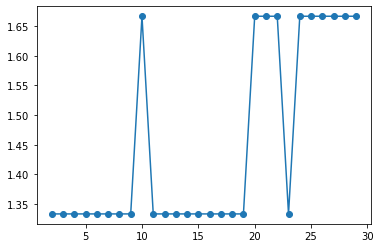

In [86]:
# Choix de k pour minimiser l'erreur
errors = []
for k in range(2,30):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_trainKNN, y_trainKNN).score(X_testKNN, y_testKNN)))
plt.plot(range(2,30), errors, 'o-')
plt.show()

In [87]:
# On r√©cup√®re le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(4)
knn.fit(X_trainKNN, y_trainKNN)
error = 1 - knn.score(X_testKNN, y_testKNN)
print('Erreur: %f' % error)

# On r√©cup√®re les pr√©dictions sur les donn√©es test
predictedKnn = knn.predict(X_testKNN)
Evaluation = pd.DataFrame()
Evaluation['y_predKNN'] = predictedKnn
Evaluation['y_testKNN'] = np.array(y_testKNN)
Evaluation

Erreur: 0.013333


y_predKNN  y_testKNN
0         True       True
1         True       True
2         True       True
3        False      False
4         True       True
..         ...        ...
295      False      False
296       True       True
297      False      False
298       True       True
299       True       True

[300 rows x 2 columns]

In [88]:
confusion(Evaluation['y_testKNN'],Evaluation['y_predKNN'])

0    1
test_0  101    4
test_1    0  195

## <a name="C16">3. Classification par r√©gression logistique </a>

La r√©gression logistique est une approche statistique qui peut √™tre employ√©e pour √©valuer et caract√©riser les relations entre une variable r√©ponse de type binaire , et une, ou plusieurs, variables explicatives, qui peuvent √™tre de type cat√©goriel , ou num√©rique continu.<br>
Dans la r√©gression logistique on mod√©lise la probabilit√© de r√©alisation d‚Äôune des deux modalit√©s.<br>
Cette probabilit√©, est mod√©lis√©e par une courbe sigmo√Øde, born√©e par 0, et 1 <br>
P(y)=exp(Œ≤0+Œ≤1X1+‚Ä¶+Œ≤nXn)/1+exp(Œ≤0+Œ≤1X1+‚Ä¶+Œ≤nXn)=exp(‚àëŒ≤X)/1+exp(‚àëŒ≤X).<br>
Tout le probl√®me de classification par r√©gression logistique appara√Æt alors comme un simple probl√®me d‚Äôoptimisation o√π, √† partir de donn√©es, nous essayons d‚Äôobtenir le meilleur jeu de param√®tre permettant √† notre courbe sigmo√Øde de coller au mieux aux donn√©es.<br> 
Pour obtenir un mod√®le lin√©aire, il est n√©cessaire de passer par une transformation logit :
logit(p)=log(p/1‚àíp)=‚àëj1nŒ≤jXij<br>

### <a name="C18">3.1 Visualisation </a>

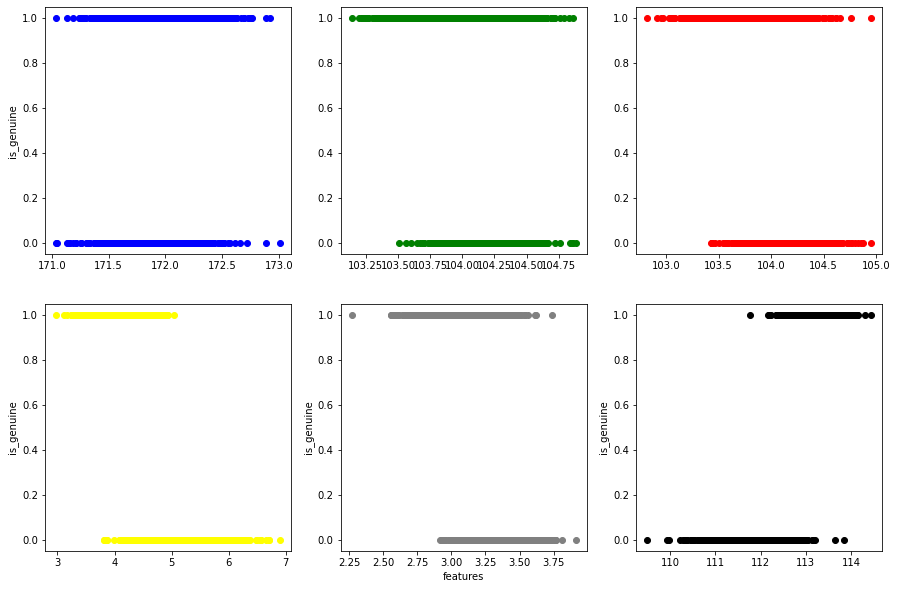

In [89]:
# La variable r√©ponse en fonction de variables explicatives
fig= plt.figure(figsize=(15,10))
plt.subplot(2, 3, 1)
plt.ylabel('is_genuine')
pltX = Billets.loc[ :,'is_genuine']
pltY = Billets.loc[ :,'diagonal']
plt.scatter(pltY, pltX, color='blue', label='diagonal')

plt.subplot(2, 3, 2)
pltX = Billets.loc[ :,'is_genuine']
pltY = Billets.loc[ :,'height_left']
plt.scatter(pltY, pltX, color='green', label='height_left')

plt.subplot(2, 3, 3)
pltX = Billets.loc[ :,'is_genuine']
pltY = Billets.loc[ :,'height_right']
plt.scatter(pltY, pltX, color='red')

plt.subplot(2, 3, 4)
plt.ylabel('is_genuine')
pltX = Billets.loc[ :,'is_genuine']
pltY = Billets.loc[ :,'margin_low']
plt.scatter(pltY, pltX, color='yellow')

plt.subplot(2, 3, 5)
plt.xlabel('features')
plt.ylabel('is_genuine')
pltX = Billets.loc[ :,'is_genuine']
pltY = Billets.loc[ :,'margin_up']
plt.scatter(pltY, pltX, color='gray', label='margin_up')

plt.subplot(2, 3, 6)
plt.ylabel('is_genuine')
pltX = Billets.loc[ :,'is_genuine']
pltY = Billets.loc[ :,'length']
plt.scatter(pltY, pltX, color='black', label='length')

### <a name="C18">3.2 R√©gression logistique apr√®s la suppression des lignes avec des valeurs Nan</a>

              precision    recall  f1-score   support

       False       1.00      0.99      0.99        99
        True       0.99      1.00      1.00       194

    accuracy                           1.00       293
   macro avg       1.00      0.99      1.00       293
weighted avg       1.00      1.00      1.00       293

0.9965870307167235


Text(0.5, 1.0, 'Matrice de confusion')

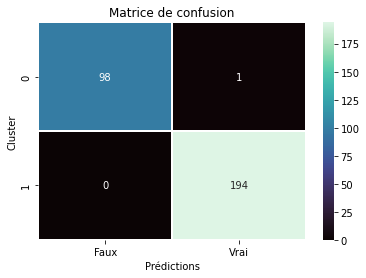

In [90]:
# Pr√©parer les donn√©es d‚Äôentrainement
XNan = BillesSansLignesNan.iloc[ :, 1:]
yNan = BillesSansLignesNan.iloc[ :,0]

# Division de la base de donn√©es
X_trainNan,X_testNan, y_trainNan, y_testNan = train_test_split(XNan, yNan, test_size=0.2, random_state=45)

# Centrer et reduire
scalerNan = StandardScaler()
X_trainNan = scalerNan.fit_transform(X_trainNan)
X_testNan = scalerNan.fit_transform(X_testNan)

# Cr√©ation du mod√®le
modelNan = LogisticRegression()
# Entrainement de mod√®le sur les donn√©es d'entrainement
modelNan.fit(X_trainNan,y_trainNan)

# Test model 
predictionRLogNan = modelNan.predict(X_testNan)

# Evaluation du model
print(classification_report(y_testNan,predictionRLogNan))
print(accuracy_score(y_testNan,predictionRLogNan))
# matrice de confusion
Mat_confusionNan = confusion_matrix(y_testNan,predictionRLogNan)

# Graphique:
sns.heatmap(Mat_confusionNan,
            annot = True,
            fmt = ".3g", 
            cmap = sns.color_palette("mako", as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["0","1"]
            )
plt.xlabel("Pr√©dictions")
plt.ylabel("Cluster")
plt.title("Matrice de confusion")

### <a name="C19">3.3 R√©gression logistique cas ou les valeurs manquantes sont imput√©es par la moyenne</a>

              precision    recall  f1-score   support

       False       1.00      0.97      0.99       105
        True       0.98      1.00      0.99       195

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

0.99


Text(0.5, 1.0, 'Matrice de confusion')

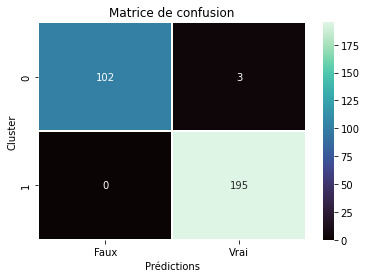

In [91]:
# Pr√©parer les donn√©es d‚Äôentrainement
XM = BilletsMoyenne.iloc[ :, 1:]
yM = BilletsMoyenne.iloc[ :,0]

# Division de la base de donn√©es
X_trainM, X_testM, y_trainM, y_testM = train_test_split(XM, yM, test_size=0.2, random_state=45)

# Centrer et reduire
scalerMoy = StandardScaler()
X_trainM = scalerMoy.fit_transform(X_trainM)
X_testM = scalerMoy.fit_transform(X_testM)
# Cr√©ation du mod√®le
modelM = LogisticRegression()
modelM.fit(X_trainM,y_trainM)

# Test model 
predictionRLogMoy = modelM.predict(X_testM)

# Evaluation du model

print(classification_report(y_testM,predictionRLogMoy))
print(accuracy_score(y_testM,predictionRLogMoy))
Mat_confusionM = confusion(y_testM,predictionRLogMoy)
# Graphique:
sns.heatmap(Mat_confusionM,
            annot = True,
            fmt = ".3g", 
            cmap = sns.color_palette("mako", as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["0","1"]
            )
plt.xlabel("Pr√©dictions")
plt.ylabel("Cluster")
plt.title("Matrice de confusion")

### <a name="C20">3.4 R√©gression logistique cas ou valeurs manquantes imput√©es grace √† une r√©gresssion logistique</a>
#### <a name="C21">3.4.1 R√©gression logistique avec statsmodels et analyse des r√©sultats statistiques</a>

In [92]:
# defining the dependent and independent variables
X = billetsS.iloc[ :,:6]
y = billetsS.iloc[ :, 6]
X = sm.tools.add_constant(X) #Il faut ajouter une constante dans Statsmodels
# building the model and fitting the data
log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.028228
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1493
Method:                           MLE   Df Model:                            6
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.9557
Time:                        17:30:35   Log-Likelihood:                -42.342
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.2546      0.365      6.180      0.000       1.540       2.970
diagonal         0.020

<div class="alert alert-block alert-info">
    
**LLR p-value** est inf√©rieure √† 0.05, le mod√®le est significatif dans son ensemble (ceci signifie qu‚Äôil y a au moins un pr√©dicteur du mod√®le qui est associ√© significativement √† la variable d√©pendante).<br>

**Le pseudo R¬≤** repr√©sente la proportion de la probabilit√© expliqu√©e par l‚Äôam√©lioration du mod√®le. Sa valeur varie entre 0 et 1. Le pseudo R¬≤ est tr√®s proche de 1.<br>

**coef** : Ces coefficients constituent les param√®tres d‚Äôestimation de la probabilit√© maximale (maximum-likelihood :Les valeurs pr√©dites de Y situ√©es le plus pr√®s possible des valeurs observ√©es) et mesurent le changement du ratio de probabilit√© (odds ratio).<br>  
Un odds ou cote est le rapport de deux probabilit√©s compl√©mentaires : la probabilit√© P de survenue d‚Äôun √©v√©nement , divis√© par la probabilit√© (1-P) que cet √©v√©nement ne survienne pas.<br>

Un coefficient issus de la r√©gression logistique est un log odds ratio cons√©cutive √† l‚Äôaugmentation d‚Äôune unit√© de la variable explicative.<br>
On a des log d'OR de certains variables  non-significatives au seuil alpha 5 % (diagonal et height_left) .Si on prend alpha 1 %, on enl√®vera height_right en plus. On recommence la r√©gression sans ces variables (diagonal, height_left).
</div> 

In [93]:
## On r√©tire la variable diagonal de notre mod√®le
X1 = billetsS.iloc[ :,1:6]
y1 = billetsS.iloc[ :, 6]
X1 = sm.tools.add_constant(X1)
# building the model and fitting the data
log_reg1 = sm.Logit(y1, X1).fit()
# printing the summary table
print(log_reg1.summary())
print('==============================================================================================')


Optimization terminated successfully.
         Current function value: 0.028230
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1494
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.9556
Time:                        17:30:36   Log-Likelihood:                -42.344
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.2551      0.365      6.183      0.000       1.540       2.970
height_left     -0.513

In [94]:
## On ne garde que les variables significatives √† alpha = 5% 
X2 = billetsS.iloc[ :,2:6]
y2 = billetsS.iloc[ :, 6]
X2 = sm.tools.add_constant(X2)
# building the model and fitting the data
log_reg2 = sm.Logit(y2, X2).fit()
# printing the summary table
print(log_reg2.summary())
print('==============================================================================================')
print('==============================================================================================')
print(log_reg2.summary2())

Optimization terminated successfully.
         Current function value: 0.029058
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1495
Method:                           MLE   Df Model:                            4
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.9543
Time:                        17:30:36   Log-Likelihood:                -43.586
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.2446      0.358      6.266      0.000       1.543       2.947
height_right    -0.906


**Les coefficients** :<br> 
ln [P(√©v√©nement)/P(non √©v√©nement)] = Œ≤0 + Œ≤1x1 + Œ≤2x2 + ... + Œ≤nxn<br>
Plus le logarithme des probabilit√©s de succ√®s est important, plus l'√©v√©nement de r√©f√©rence(le billet est vrai) est probable. Ainsi, des coefficients positifs indiquent que la probabilit√© de l'√©v√©nement augmente, tandis que des coefficients n√©gatifs indiquent qu'elle diminue.<br>

Le log des cotes n'est pas intuitif dans son interpr√©tation. Convertissons cela en rapport de cotes(OR) et interpr√©tons √† nouveau le mod√®le. Pour convertir les coefficients de probabilit√© logarithmique il faut prendre l'exponentielle des valeurs.<br>

L'OR repr√©sente les chances qu'un r√©sultat se produise compte tenu d'un √©v√©nement particulier, par rapport aux chances que le r√©sultat se produise en l'absence de cet √©v√©nement. Si l'OR est sup√©rieur √† 1, l'√©v√©nement est associ√© √† une probabilit√© plus √©lev√©e de g√©n√©rer un r√©sultat sp√©cifique. Inversement, si l'OR est inf√©rieur √† 1, l'√©v√©nement est associ√© √† une probabilit√© plus faible que ce r√©sultat se produise.

OR = 1, m√™mes cotes<br>
OR < 1, moins/diminution des cotes<br>
OR > 1, plus grand/augmentation des cotes<br>

In [95]:
# convertir les coefficients de probabilit√© logarithmique 
model_odds = pd.DataFrame(np.exp(log_reg2.params), columns= ['OR'])
model_odds['z-value']= log_reg2.pvalues
model_odds

OR       z-value
const           9.436767  3.696511e-10
height_right    0.404056  9.803182e-03
margin_low      0.018418  1.919526e-11
margin_up       0.093907  9.097944e-07
length        184.907605  4.578121e-13

<div class="alert alert-block alert-info">
Les variables explicatives sont num√©riques continues, dans cette situation, on n‚Äôinterpr√®te pas la valeur de l‚ÄôOR.
On regarde le signe de l‚ÄôOR, et s‚Äôil est significativement diff√©rent de 1 (pvalue du log OR <0.05).<br>
    
Il existe une association significative entre length et la chance que le billet soit vrai, avec un risque de 5% de se tromper, La chance que le billet soit vrai augmente lorsque length augmente.<br>

Il existe une association significative entre les autres variables (height_right,margin_low,margin_up) et la chance que le billet soit vrai, avec un risque de 5% de se tromper, La chance que le billet soit vrai diminue lorsque ces dimensions augmentent.<br>
</div>  

In [96]:
# lien pour interpr√©ter les coefficients 
webbrowser.open('https:delladata.fr/regression-logistique/')

True

In [97]:
# V√©rification de nos'interpr√©tations par le calcul
print("La langueur moyenne de vrais billets est", round(Billets[Billets['is_genuine'] == True]['length'].mean(),2)) 
print("La langueur moyenne de faux billets est", round(Billets[Billets['is_genuine'] == False]['length'].mean(),2))
print('==================================================================')
print("La moyenne de la variable margin_up de vrais billets est", 
      round(Billets[Billets['is_genuine'] == True]['margin_up'].mean(),2))
print("La moyenne de la variable margin_up de Faux billets est",
      round(Billets[Billets['is_genuine'] == False]['margin_up'].mean(),2))
print('==================================================================')
print("La moyenne de la variable height_right de vrais billets est",
      round(Billets[Billets['is_genuine'] == True]['height_right'].mean(),2))
print("La moyenne de la variable height_right de Faux billets est",
      round(Billets[Billets['is_genuine'] == False]['height_right'].mean(),2))
print('==================================================================')
print("La moyenne de la variable margin_low de vrais billets est",
      round(Billets[Billets['is_genuine'] == True]['margin_low'].mean(),2))
print("La moyenne de la variable margin_low de Faux billets est",
      round(Billets[Billets['is_genuine'] == False]['margin_low'].mean(),2))


La langueur moyenne de vrais billets est 113.2
La langueur moyenne de faux billets est 111.63
La moyenne de la variable margin_up de vrais billets est 3.05
La moyenne de la variable margin_up de Faux billets est 3.35
La moyenne de la variable height_right de vrais billets est 103.81
La moyenne de la variable height_right de Faux billets est 104.14
La moyenne de la variable margin_low de vrais billets est 4.12
La moyenne de la variable margin_low de Faux billets est 5.22


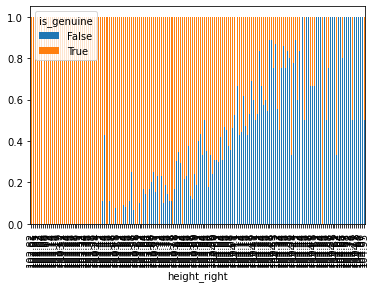

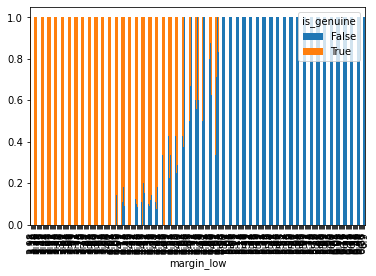

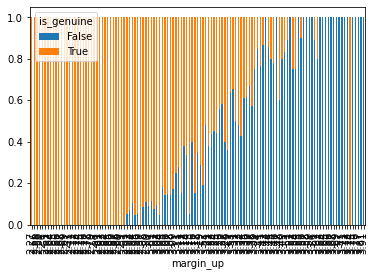

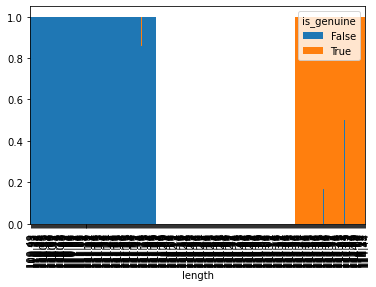

In [98]:
# V√©rification visuelle de interp√©tations
variable_list = ['height_right','margin_low','margin_up','length']
for variable in variable_list:
    table = pd.crosstab(Billets[variable],Billets.is_genuine)
    table.div(table.sum(1).astype(float),axis =0).plot(kind = 'bar',stacked = True)

### <a name="C22">3.4.2 Logistic Regression Assumptions</a>

**Assumption 1 - Appropriate outcome type**<br>
 La r√©gression logistique binaire exige que la variable d√©pendante soit binaire.

In [99]:
# Appropriate outcome type
billetsS['is_genuine'].unique()

array([ True, False])

**Assumption 2 - Linearity of independent variables and log odds**<br>
La r√©gression logistique suppose la lin√©arit√© des variables ind√©pendantes et des cotes logarithmiques.<br>
La transformation de Box-Tidwell (test) peut √™tre utilis√©e pour tester l'hypoth√®se de la lin√©arit√©.<br>
Une valeur p statistiquement significative du terme d'interaction dans la transformation de Box-Tidwell signifie que l'hypoth√®se de lin√©arit√© est viol√©e.<br>

In [100]:
# Box Tidwell only works for positive values. Hence, drop values where x <= 0
df_billets = billetsS.drop(billetsS[billetsS.margin_up <= 0].index)
df_billets = df_billets.drop(df_billets[df_billets.margin_low <= 0].index)
df_billets = df_billets.drop(df_billets[df_billets.height_right<= 0].index)
df_billets = df_billets.drop(df_billets[df_billets.length<= 0].index)
df_billets.head()

diagonal  height_left  height_right  margin_low  margin_up    length  \
310  1.676733    -0.532911      0.736343    0.217052   0.123100  0.345583   
341 -0.191548     0.602838      0.889944    0.428027   0.986152  0.597750   
416  1.578402     0.268794      1.012825    0.066356   0.123100  0.838454   
428 -0.322655    -0.866955      0.029778    0.518445   0.079947  0.769681   
430  0.529543     0.168581      0.029778    0.352679   0.123100  0.804068   

     is_genuine  
310        True  
341        True  
416        True  
428        True  
430        True

In [101]:
df_billets_lt = df_billets[['height_right','margin_low','margin_up','length','is_genuine']].copy()  # lt = logit transform

# Define continuous variables
variable_list = ['height_right','margin_low','margin_up','length']

# Add logit transform interaction terms (natural log) for continuous variables
for var in variable_list:
    df_billets_lt[f'{var}:Log_{var}'] = df_billets_lt[var].apply(lambda x: x * np.log(x)) #np.log = natural log
# Display
df_billets_lt.head()


height_right  margin_low  margin_up    length  is_genuine  \
310      0.736343    0.217052   0.123100  0.345583        True   
341      0.889944    0.428027   0.986152  0.597750        True   
416      1.012825    0.066356   0.123100  0.838454        True   
428      0.029778    0.518445   0.079947  0.769681        True   
430      0.029778    0.352679   0.123100  0.804068        True   

     height_right:Log_height_right  margin_low:Log_margin_low  \
310                      -0.225364                  -0.331573   
341                      -0.103764                  -0.363210   
416                       0.012907                  -0.180005   
428                      -0.104640                  -0.340578   
430                      -0.104640                  -0.367561   

     margin_up:Log_margin_up  length:Log_length  
310                -0.257865          -0.367190  
341                -0.013752          -0.307592  
416                -0.257865          -0.147732  
428                -0.201978          -0.201486  
430                -0.257865          -0.175344

In [102]:
# Keep columns related to continuous variables
cols_to_keep = variable_list + df_billets_lt.columns.tolist()[-len(variable_list):]
cols_to_keep

['height_right',
 'margin_low',
 'margin_up',
 'length',
 'height_right:Log_height_right',
 'margin_low:Log_margin_low',
 'margin_up:Log_margin_up',
 'length:Log_length']

In [103]:
# Redefine independent variables to include interaction terms
X_lt = df_billets_lt[cols_to_keep]
y_lt = df_billets_lt['is_genuine']

# Add constant
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_lt, X_lt_constant, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

PerfectSeparationError: Perfect separation detected, results not available

<div class="alert alert-block alert-danger">
En raison de la s√©paration parfaite, notre mod√®le ne peut pas converger. Une s√©paration parfaite signifie qu'il y a une (ou plusieurs) variable dans nos variables ind√©pendantes qui peuvent parfaitement distinguer la variable d√©pendante = 0 de la variable d√©pendante = 1.<br>
D'apr√®s les graphiques et les analyses pr√©c√©dentes la variable length permet de s√©parer les billets ainsi on va enl√©ver la variable length.
</div>

In [104]:
df_billets_lt = df_billets[['height_right','margin_low','margin_up','is_genuine']].copy()  # lt = logit transform

# Define continuous variables
variable_list = ['height_right','margin_low','margin_up']

# Add logit transform interaction terms (natural log) for continuous variables 
for var in variable_list:
    df_billets_lt[f'{var}:Log_{var}'] = df_billets_lt[var].apply(lambda x: x * np.log(x)) #np.log = natural log

df_billets_lt.head()

height_right  margin_low  margin_up  is_genuine  \
310      0.736343    0.217052   0.123100        True   
341      0.889944    0.428027   0.986152        True   
416      1.012825    0.066356   0.123100        True   
428      0.029778    0.518445   0.079947        True   
430      0.029778    0.352679   0.123100        True   

     height_right:Log_height_right  margin_low:Log_margin_low  \
310                      -0.225364                  -0.331573   
341                      -0.103764                  -0.363210   
416                       0.012907                  -0.180005   
428                      -0.104640                  -0.340578   
430                      -0.104640                  -0.367561   

     margin_up:Log_margin_up  
310                -0.257865  
341                -0.013752  
416                -0.257865  
428                -0.201978  
430                -0.257865

In [105]:
# Keep columns related to continuous variables
cols_to_keep = variable_list + df_billets_lt.columns.tolist()[-len(variable_list):]
cols_to_keep

['height_right',
 'margin_low',
 'margin_up',
 'height_right:Log_height_right',
 'margin_low:Log_margin_low',
 'margin_up:Log_margin_up']

In [106]:
# Redefine independent variables to include interaction terms
X_lt = df_billets_lt[cols_to_keep]
y_lt = df_billets_lt['is_genuine']

# Add constant
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_lt, X_lt_constant, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

PerfectSeparationError: Perfect separation detected, results not available

<div class="alert alert-block alert-danger">
Pareil, en raison de la s√©paration parfaite, notre mod√®le ne peut pas converger. 
On va enl√©ver la variable margin_low.
</div>


In [107]:
df_billets_lt = df_billets[['height_right','margin_up','is_genuine']].copy()  # lt = logit transform

# Define continuous variables
variable_list = ['height_right','margin_up']

# Add logit transform interaction terms (natural log) for continuous variables
for var in variable_list:
    df_billets_lt[f'{var}:Log_{var}'] = df_billets_lt[var].apply(lambda x: x * np.log(x)) #np.log = natural log

df_billets_lt.head()

height_right  margin_up  is_genuine  height_right:Log_height_right  \
310      0.736343   0.123100        True                      -0.225364   
341      0.889944   0.986152        True                      -0.103764   
416      1.012825   0.123100        True                       0.012907   
428      0.029778   0.079947        True                      -0.104640   
430      0.029778   0.123100        True                      -0.104640   

     margin_up:Log_margin_up  
310                -0.257865  
341                -0.013752  
416                -0.257865  
428                -0.201978  
430                -0.257865

In [108]:
# Keep columns related to continuous variables
cols_to_keep = variable_list + df_billets_lt.columns.tolist()[-len(variable_list):]
cols_to_keep

['height_right',
 'margin_up',
 'height_right:Log_height_right',
 'margin_up:Log_margin_up']

In [109]:
# Redefine independent variables to include interaction terms
X_lt = df_billets_lt[cols_to_keep]
y_lt = df_billets_lt['is_genuine']

# Add constant
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_lt, X_lt_constant, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                   30
Model:                            GLM   Df Residuals:                       25
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11.194
Date:                Sun, 22 Jan 2023   Deviance:                       22.388
Time:                        17:31:13   Pearson chi2:                     21.1
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
height_right  

Selon le test de Box-Tidewell, si le coefficient Z est significatif pour les log_x cela signifie que la variable x intervient de mani√®re non-lin√©aire sur le logit. On regarde donc les p-value pour les log_x.
Pour log_margin_up et log_height_right, la p-value de Z est sup√©rieure √† 0,05, l'hypoth√®se nulle de lin√©arit√© ne peut pas √™tre rejet√©e.

 
 </div> <div class="alert alert-block alert-warning"> Les variables length et margin_low s√©parent parfaitement les donn√©es. Normalment on peut les transformer √† des variables categorielles.<br>
Pour length on aura deux groupes (billet_long, billet_court) ainsi length sera une variable binaire.<br>
Pour margin_low on aura trois groupes (margin_low_petit, margin_low_moyen, margin_low_grand) ainsi la variable margin_low sera une variable qualitative avec trois modalit√©s. (Regardez les graphiques en dessous de cette paragraphe)<br>
Si on transforme length et margin_low en categorielles il nous faut faire apr√®s une √©tape de pr√©paration des donn√©es:
<ul>
  <li>Pour la variable binaire length il nous suffit de les recoder avec Scikit-Learn pour obtenir des donn√©es exploitables.On peut utiliser LabelEncoder pour transformer les valeurs textuelles en entiers</li>
  <li>Pour la variable margin_low avec trois modalit√© on utilise LabelEncoder pour la transformer en entiers puis on utilise la classe OneHotEncoder afin de transformer la colonne margin_low en trois colonnes binaires.</li>
  </ul>
On applique √† ces variables qualitatives une OneHot et une transformation avec StandardScaler pour les variables quantitative (height_right et margin_up).<b>

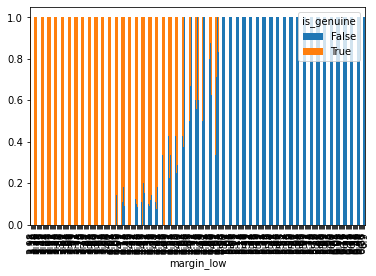

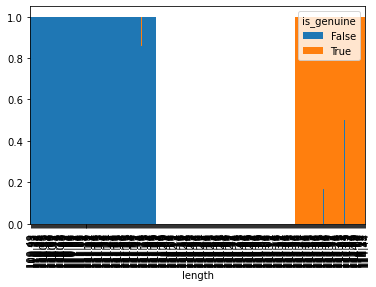

In [110]:
# V√©rification visuelle
variable_list = ['margin_low','length']
for variable in variable_list:
    table = pd.crosstab(Billets[variable],Billets.is_genuine)
    table.div(table.sum(1).astype(float),axis =0).plot(kind = 'bar',stacked = True)

### Visual check of Linearity assumption

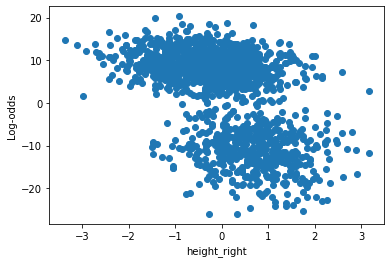

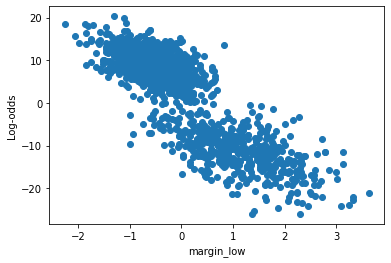

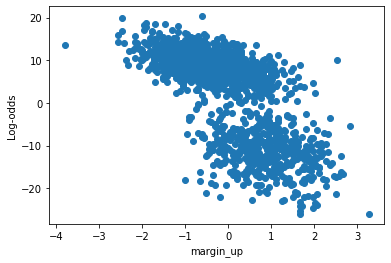

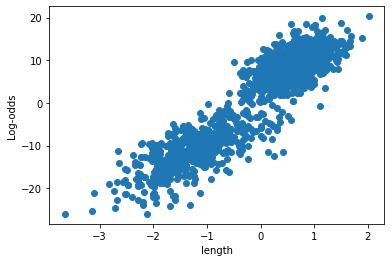

In [111]:
# Re-run logistic regression on original set of X and y variables
log_reg2 = GLM(y2, X2, family=families.Binomial()).fit()
predicted = log_reg2.predict(X2)

# Get log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor continuous variable vs logit values 
variable_list = ['height_right','margin_low','margin_up','length']
for variable in variable_list:
    plt.scatter(x=X2[variable].values, y=log_odds);
    plt.xlabel(variable)
    plt.ylabel("Log-odds")
    plt.show()


#### Assumption 3 - No strongly influential outliers

In [112]:
# building the model and fitting the data
log_reg3 = GLM(y2, X2,family=families.Binomial()).fit()
print(log_reg3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1495
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -43.586
Date:                Sun, 22 Jan 2023   Deviance:                       87.173
Time:                        17:31:18   Pearson chi2:                 3.24e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.2446      0.358      6.266   

In [113]:

from scipy import stats

# Get influence measures
influence = log_reg3.get_influence()

# Obtain summary df of influence measures
summ_df = influence.summary_frame()

# Filter summary df to Cook distance
diagnosis_df = summ_df.loc[:,['cooks_d']]

# Append absolute standardized residual values
diagnosis_df['std_resid'] = stats.zscore(log_reg3.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

# Sort by Cook's Distance
diagnosis_df.sort_values("cooks_d", ascending=False)
diagnosis_df.head()

cooks_d  std_resid
0  1.443531e-03   0.188781
1  4.466100e-11   0.018903
2  4.088791e-09   0.024282
3  5.060989e-13   0.017293
4  1.973192e-03   0.263415

In [114]:
# Set Cook's distance threshold
cook_threshold = 4 /(len(X2)-4)
print(f"Threshold for Cook Distance = {cook_threshold}")

Threshold for Cook Distance = 0.00267379679144385


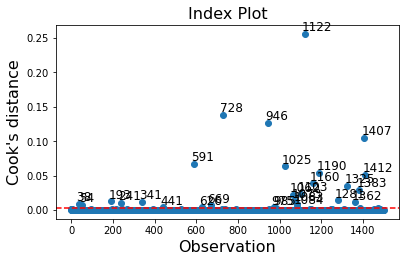

In [115]:
# Plot influence measures (Cook's distance)
fig = influence.plot_index(y_var="cooks", threshold=cook_threshold)
plt.axhline(y=cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)


In [116]:
# Find number of observations that exceed Cook's distance threshold
outliers = diagnosis_df[diagnosis_df['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(X2)),1)
print(f'Proportion of data points that are highly influential = {prop_outliers}%')

Proportion of data points that are highly influential = 1.9%


In [117]:
# Find number of observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]
prop_extreme = round(100*(len(extreme)/ len(X2)),1)
print(f'Proportion of highly influential outliers = {prop_extreme}%')

Proportion of highly influential outliers = 0.2%


In [118]:
# Display most influential outliers
extreme.sort_values("cooks_d", ascending=False)

cooks_d  std_resid
1122  0.256374  37.965280
728   0.138047   3.934187
1407  0.104823   3.107062

In [119]:
# Supprimer les outliers influentes
extrem_idx=extreme.index
Billet_sansOutliersInflu = billetsS.drop(extreme.index)

**Assumption 4 - Absence of multicollinearity**<br>
La r√©gression logistique exige qu‚Äôil y ait peu ou pas de multicolin√©arit√© entre les variables ind√©pendantes. Cela signifie que les variables ind√©pendantes ne doivent pas √™tre trop fortement corr√©l√©es les unes aux autres.

In [120]:
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(X2) # Include constant in VIF calculation in Python


variables       VIF
0         const  1.000027
1  height_right  1.246905
2    margin_low  1.906386
3     margin_up  1.411962
4        length  2.113826

<div class="alert alert-block alert-info">
VIF <10 Il n'y a donc pas de collin√©arit√©
</div>    

**Assumption 5‚Äî Independence of observations**<br>
Les observations doivent √™tre ind√©pendantes les unes des autres, c'est-√†-dire qu'elles ne doivent pas provenir de donn√©es r√©p√©t√©es ou appari√©es. Cela signifie que chaque observation n'est pas influenc√©e ou li√©e au reste des observations.

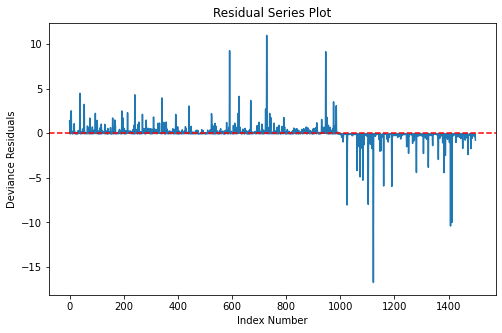

In [121]:
# Generate residual series plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, title="Residual Series Plot",
                    xlabel="Index Number", ylabel="Deviance Residuals")

# ax.plot(X.index.tolist(), stats.zscore(logit_results.resid_pearson))
ax.plot(X2.index.tolist(), stats.zscore(log_reg2.resid_deviance))
plt.axhline(y=0, ls="--", color='red');


<div class="alert alert-block alert-info">
Les r√©sidus jusqu'√† l'index 1000 sont positifs et pour les index de 1000 jusqu'√† 1500 sont n√©gatifs.<br>
Explication:  nous pr√©disons une probabilit√© pour une variable prenant les valeurs 0 ou 1. Si la vraie valeur est 0 (False), alors nous pr√©disons toujours plus, et les r√©sidus doivent √™tre n√©gatifs (de l'index 1000 jusqu'√† 1500 sont des faux billets) et si la vraie valeur est 1, alors nous sous-estimons, et les r√©sidus doivent √™tre positifs (de l'index 0 jusqu'√† 1000 on a des vrais billets).<br>
 </div> 
<div class="alert alert-block alert-danger">
√âtant donn√© que les r√©sidus dans le graphique ci-dessus semblent √™tre dispers√©s de mani√®re non al√©atoire autour de la ligne m√©diane de z√©ro, nous pouvons en d√©duire (visuellement) que l'hypoth√®se est non satisfaite.
Les observations ne sont pas ind√©pendantes les unes des autres car les donn√©es sont appari√©es c'est √† dire group√©es. 
</div>

**Assumption 6 - Sufficiently large sample size**
La r√©gression logistique n√©cessite g√©n√©ralement une grande taille d‚Äô√©chantillon. En g√©n√©rale il faut qu'on ait au moins 10 cas avec le r√©sultat le moins fr√©quent pour chaque variable ind√©pendante de mod√®le.

### <a name="C23">3.4.3 Logistic regression (Scikit-learn package)</a>
### Data separation


In [122]:
X = billetsS.iloc[ :,2:6] # features
y = billetsS.is_genuine # target


### Test train split

In [123]:
# Division de la base de donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
print(f"Nous avons X_train de forme {X_train.shape} et y_train de forme {y_train.shape}")
print(f"Nous avons X_test de forme {X_test.shape} et y_test de forme {y_test.shape}")

Nous avons X_train de forme (1200, 4) et y_train de forme (1200,)
Nous avons X_test de forme (300, 4) et y_test de forme (300,)


In [124]:
def score(estimator) :
    """compute and print train scoreand test score"""
    tr_score = estimator.score(X_train,y_train).round(4)
    te_score = estimator.score(X_test,y_test).round(4)
    print(f"score train :{tr_score} score test :{te_score}")

### Mod√©lisation: Dummy classifier (classifieur na√Øf )

Dans la r√©gression logistique, le mod√®le de base est le plus grand nombre de cas, c‚Äôest-√†-dire la cat√©gorie (0 ou 1) qui obtient la fr√©quence la plus √©lev√©e. En effet, il ne serait pas judicieux d‚Äôutiliser la moyenne comme dans la r√©gression lin√©aire, puisque la moyenne de 0 et de 1 ne ferait pas de sens. 

In [125]:
estimator = DummyClassifier(strategy = "most_frequent")
estimator.fit(X_train,y_train)


DummyClassifier(strategy='most_frequent')

In [126]:
y_pred = estimator.predict(X_test)

In [1007]:
pd.Series(y_pred).value_counts()

True    300
dtype: int64

In [1008]:
y_test.value_counts(normalize = True)

True     0.65
False    0.35
Name: is_genuine, dtype: float64

In [1009]:
score(estimator)

score train :0.6708 score test :0.65


<div class="alert alert-block alert-info">
La forme des donn√©es est compatible avec une mod√©lisation.
Le DummyClassifier donne une id√©e du score de base que l'algorithme le plus simple obtiendrait en faisant des pr√©dictions.
</div> 

In [1010]:
confusion(y_test,y_pred)

0    1
test_0  0  105
test_1  0  195

### Mod√©lisation:  Logistic regression

In [1011]:
# On instancie
estimator =  LogisticRegression()
# On fit
estimator.fit(X_train,y_train)
# pr√©diction
y_pred = estimator.predict(X_test)
y_proba = estimator.predict_proba(X_test).round(3)

In [1012]:
score(estimator)
confusion(y_test,y_pred)


score train :0.9908 score test :0.99


0    1
test_0  102    3
test_1    0  195

In [1013]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate).round(2)
print(roc_auc)


0.99


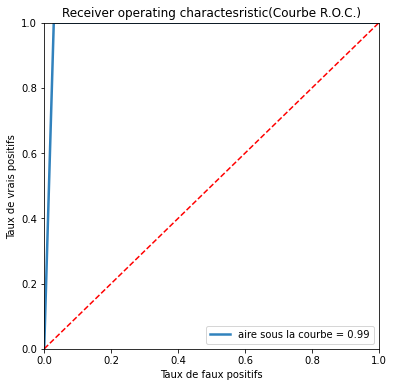

In [1014]:
# Graphique:
plt.figure(figsize=(6,6))
plt.title('Receiver operating charactesristic(Courbe R.O.C.)')
plt.plot(false_positive_rate,
        true_positive_rate,
        color="#3182bd",
        linewidth=2.5,
        label="aire sous la courbe = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1],color="red", linestyle="--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = "lower right")
plt.ylabel("Taux de vrais positifs")
plt.xlabel("Taux de faux positifs")
plt.show()

### Finding hyper-parameters

In [1015]:
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [1016]:
# LogisticRegression instance
estimator = LogisticRegression()
clf = GridSearchCV(estimator,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [1017]:
# Entrainement
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [1018]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9916666666666668


### Appliquer le mod√®le de regression logistique

In [1019]:
# On instancie
modelRLog = LogisticRegression(C = 0.1, 
                            penalty = 'l2', solver = 'liblinear')
# On fit
modelRLog.fit(X_train,y_train)
# pr√©diction
y_pred = modelRLog.predict(X_test)
# Evaluation
score(modelRLog)
confusion(y_test,y_pred)

score train :0.99 score test :0.99


0    1
test_0  102    3
test_1    0  195

In [1020]:
scoreRL = modelRLog.decision_function(X_test)
dfsc = pd.DataFrame(scoreRL, columns=['score'])
dfsc['is_genuine'] = np.array(y_test)
dfsc.head()

score  is_genuine
0  3.734096        True
1  5.872318        True
2  1.742925        True
3 -7.254511       False
4  3.707430        True

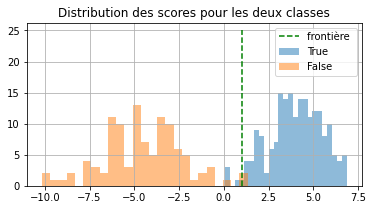

In [1021]:
ax = dfsc[dfsc['is_genuine'] == True]['score'].hist(bins=25, figsize=(6,3), label='True', alpha=0.5)
dfsc[dfsc['is_genuine'] == False]['score'].hist(bins=25, ax=ax, label='False', alpha=0.5)
ax.set_title("Distribution des scores pour les deux classes")
ax.plot([1, 1], [0, 25], 'g--', label="fronti√®re ")
ax.legend();

### <a name="C24">4. Les indicateurs pour valider un mod√®le</a> 
La partie validation d‚Äôun mod√®le d‚Äôapprentissage supervis√© est extr√™mement importante. L‚Äôobjectif d‚Äôun mod√®le d‚Äôapprentissage supervis√© est de pr√©dire une valeur la plus proche possible de la r√©alit√©.

**Le pourcentage de bien class√©s**
Il s‚Äôagit de l‚Äôindicateur le plus connu. On le nomme accuracy. Il est calcul√© √† partir du rapport entre le nombre d‚Äôindividus bien class√©s et le nombre total d‚Äôindividus dans l‚Äô√©chantillon.<br>
Accuracy Score = (TP + TN)/(TP + FN + TN + FP)

In [1022]:
accuracy_modele_KM = accuracy_score(y_testKM,predictionsKM)
accuracy_modele_kNN = accuracy_score(y_testKNN,predictedKnn)
accuracy_modeleRLogNan = accuracy_score(y_testNan,predictionRLogNan)
accuracy_modeleRLogMoy = accuracy_score(y_testM,predictionRLogMoy)
accuracy_modeleRLog = accuracy_score(y_test,y_pred)
print("Pourcentage de bien class√©s pour le mod√®le KM :", round(accuracy_modele_KM,4))
print("Pourcentage de bien class√©s pour le mod√®le kNN :", round(accuracy_modele_kNN,4))
print("Pourcentage de bien class√©s pour le mod√®le RLogNan :", round(accuracy_modeleRLogNan,4))
print("Pourcentage de bien class√©s pour le mod√®le RLogMoy :", round(accuracy_modeleRLogMoy,4))
print("Pourcentage de bien class√©s pour le mod√®le modeleRLog :", round(accuracy_modeleRLog,4))

Pourcentage de bien class√©s pour le mod√®le KM : 0.9767
Pourcentage de bien class√©s pour le mod√®le kNN : 0.9867
Pourcentage de bien class√©s pour le mod√®le RLogNan : 0.9966
Pourcentage de bien class√©s pour le mod√®le RLogMoy : 0.99
Pourcentage de bien class√©s pour le mod√®le modeleRLog : 0.99


**La matrice de confusion**
Il s‚Äôagit d‚Äôun autre indicateur important pour juger de la qualit√© d‚Äôun mod√®le, il n‚Äôest pas d√©fini par une seule valeur mais par une matrice dans laquelle on peut lire le croisement entre les valeurs observ√©es et les valeurs pr√©dites √† partir du mod√®le.

In [1023]:
confusion_matrix_KM = confusion_matrix(y_testKM,predictionsKM)
confusion_matrix_kNN = confusion_matrix(y_testKNN,predictedKnn)
confusion_matrix_modeleRLogNan = confusion_matrix(y_testNan,predictionRLogNan)
confusion_matrix_modeleRLogMoy = confusion_matrix(y_testM,predictionRLogMoy)
confusion_matrix_modeleRLog = confusion_matrix(y_test,y_pred)
print("Matrice de confusion pour le mod√®le KM :",
confusion_matrix_KM, sep="\n")
print('======================================')
print("Matrice de confusion pour le mod√®le knn :",
confusion_matrix_kNN, sep="\n")
print('======================================')
print("Matrice de confusion pour le mod√®le RLogNan :",
confusion_matrix_modeleRLogNan, sep="\n")
print('======================================')
print("Matrice de confusion pour le mod√®le RLogMoy :",
confusion_matrix_modeleRLogMoy, sep="\n")
print('======================================')
print("Matrice de confusion pour le mod√®le RLog :",
confusion_matrix_modeleRLog, sep="\n")

Matrice de confusion pour le mod√®le KM :
[[101   4]
 [  3 192]]
Matrice de confusion pour le mod√®le knn :
[[101   4]
 [  0 195]]
Matrice de confusion pour le mod√®le RLogNan :
[[ 98   1]
 [  0 194]]
Matrice de confusion pour le mod√®le RLogMoy :
[[102   3]
 [  0 195]]
Matrice de confusion pour le mod√®le RLog :
[[102   3]
 [  0 195]]


**Le rappel (recall), la pr√©cision et le f1-score**
Scikit-Learn poss√®de des fonctions pour chacun de ces indicateurs, mais il peut √™tre int√©ressant d‚Äôutiliser une autre fonction qui les affiche pour chaque classe :<br>

Precision Score = TP / (FP + TP)<br>
Recall Score = TP / (FN + TP)<br>
F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)<br>

In [1024]:
print("Rapport pour le mod√®le KM :",
      classification_report(y_testKM,predictionsKM), sep="\n")
print('=========================================')
print("Rapport pour le mod√®le kNN :",
      classification_report(y_testKNN,predictedKnn) ,sep="\n")
print('=========================================')
print("Rapport pour le mod√®le RLogNan :",
      classification_report(y_testNan,predictionRLogNan), sep="\n")
print('=========================================')      
print("Rapport pour le mod√®le RLogMoy :",
      classification_report(y_testM,predictionRLogMoy), sep="\n")
print('=========================================')      
print("Rapport pour le mod√®le RLog :",
      classification_report(y_test,y_pred), sep="\n")


Rapport pour le mod√®le KM :
              precision    recall  f1-score   support

       False       0.97      0.96      0.97       105
        True       0.98      0.98      0.98       195

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.98      0.98      0.98       300

Rapport pour le mod√®le kNN :
              precision    recall  f1-score   support

       False       1.00      0.96      0.98       105
        True       0.98      1.00      0.99       195

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300

Rapport pour le mod√®le RLogNan :
              precision    recall  f1-score   support

       False       1.00      0.99      0.99        99
        True       0.99      1.00      1.00       194

    accuracy                           1.00       293
   macro avg       1.00      0.99  

**La courbe ROC**
Nous avons vu que lorsque les classes sont fortement d√©s√©quilibr√©es, la matrice de confusion est parfois dure √† interpr√©ter. La courbe ROC (Receiver Operating Characteristic) est l√† pour combler ce d√©faut. Elle est en fait la proportion de vrais positifs en fonction de la proportion de faux positifs.

Il s‚Äôagit en fait de repr√©senter le rappel (recall) en fonction de (1- sp√©cificit√©) sur une courbe en faisant varier le seuil de classification (c‚Äôest-√†-dire le point √† partir duquel une observation est consid√©r√©e comme positive).

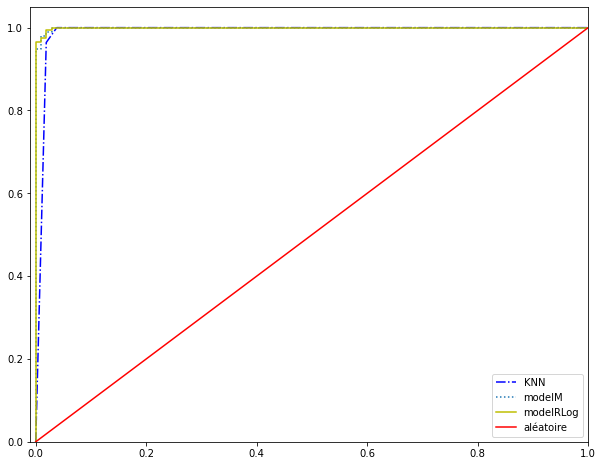

In [1025]:

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve
fig = plt.figure(figsize=(10,8))
# on extrait les probabilit√©s d'appartenance
proba_knn = knn.predict_proba(X_testKNN)[:,1]
proba_RLogMoy = modelM.predict_proba(X_testM)[:,1]
proba_RLog = modelRLog.predict_proba(X_test)[:,1]
# cas du mod√®le KNN
fpr, tpr, _ = roc_curve(y_testKNN, proba_knn)
plt.plot(fpr,tpr,"b-.", label="KNN")

# cas du mod√®le RLogMoy
fpr, tpr, _ = roc_curve(y_testM, proba_RLogMoy)
plt.plot(fpr,tpr,":", label="modelM")

# cas du mod√®le RLog
fpr, tpr, _ = roc_curve(y_test, proba_RLog)
plt.plot(fpr,tpr,"y-", label="modelRLog")

# mod√®le al√©atoire
plt.plot([0, 1], [0, 1],"r-", label="al√©atoire", )

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.legend()

**L‚Äôaire sous la courbe ROC**
La courbe ROC est un indicateur important mais on pr√©f√®re souvent une valeur plut√¥t qu‚Äôune courbe afin de comparer nos mod√®les. Pour cela, on utilise l‚Äôaire sous la courbe ROC (AUC). Cette aire est calcul√©e directement √† partir de la courbe ROC. Ainsi, un mod√®le al√©atoire aura une AUC de 0.5 et un mod√®le parfait aura une AUC de 1.

In [1026]:

auc_modele_knn = roc_auc_score(y_testKNN ,knn.predict_proba(X_testKNN)[:,1])
auc_modele_RLogNan = roc_auc_score(y_testNan ,modelNan.predict_proba(X_testNan)[:,1])
auc_modele_RLogMoy = roc_auc_score(y_testM ,modelM.predict_proba(X_testM)[:,1])
auc_modele_RLog = roc_auc_score(y_test, modelRLog.predict_proba(X_test)[:,1])
print("Aire sous la courbe ROC pour le mod√®le KNN :" , round(auc_modele_knn,4))
print("Aire sous la courbe ROC pour le mod√®le  RLogNan:" ,round(auc_modele_RLogNan,4))
print("Aire sous la courbe ROC pour le mod√®le  RLogMoy:" ,round(auc_modele_RLogMoy,4))
print("Aire sous la courbe ROC pour le mod√®le  RLog:" ,round(auc_modele_RLog,4))

Aire sous la courbe ROC pour le mod√®le KNN : 0.9898
Aire sous la courbe ROC pour le mod√®le  RLogNan: 0.9995
Aire sous la courbe ROC pour le mod√®le  RLogMoy: 0.9992
Aire sous la courbe ROC pour le mod√®le  RLog: 0.9994


**La validation crois√©e**
Jusqu‚Äôici nous avons utilis√© des indicateurs bas√©s sur une seule occurrence de test. Ceci veut dire qu‚Äôon ne teste notre mod√®le que sur un seul √©chantillon.

Une approche alternative souvent utilis√©e est la validation crois√©e. Celle-ci est en fait bas√©e sur la r√©p√©tition de l‚Äôestimation et de la validation sur des donn√©es diff√©rentes.


In [1027]:
scores_knn = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')
scores_RLogNan = cross_val_score(modelNan, XNan, yNan, cv=10, scoring='roc_auc')
scores_RLogM = cross_val_score(modelM, XM, yM, cv=10, scoring='roc_auc')
scores_RLog = cross_val_score(modelRLog, X, y, cv=10, scoring='roc_auc')

print("AUC pour KNN : %.2f (+/- %.2f)"% (scores_knn.mean(), scores_knn.std() * 2))
print("AUC pour RLogNan : %.2f (+/- %.2f)"% (scores_RLogNan.mean(), scores_RLogNan.std() * 2))
print("AUC pour RLogM : %.2f (+/- %.2f)"% (scores_RLogM.mean(), scores_RLogM.std() * 2))
print("AUC pour RLog : %.2f (+/- %.2f)"% (scores_RLog.mean(), scores_RLog.std() * 2))

AUC pour KNN : 0.99 (+/- 0.01)
AUC pour RLogNan : 1.00 (+/- 0.01)
AUC pour RLogM : 1.00 (+/- 0.01)
AUC pour RLog : 1.00 (+/- 0.01)


### <a name="C25">5.Pr√©diction sur des donn√©es inconnues</a>
**mod√®le K-means**

In [1028]:
# Data
df =pd.read_csv('billets_production (1).csv', sep=',')
test = df[["diagonal","height_left","height_right","margin_low","margin_up","length"]]
features = test.columns # Enregister les colonnes dans une variable nomm√©e features
# Centrer et reduire les donn√©es
# On transforme
test = scaler.transform(test)
# Convertir en DataFrame
test = pd.DataFrame(test)
test.columns = features
# concatenating avec les donn√©es d'entrainement
Df = pd.concat([billets_kmeans[["diagonal","height_left","height_right","margin_low","margin_up","length"]], test],)

model_kmeans.fit(Df)
cluster = model_kmeans.labels_ == 1
# Ajouter une colonne cluster
Df["pr√©diction"] = cluster
Df["pr√©diction"] = Df["pr√©diction"].astype('str')
if len(Df.loc[Df["pr√©diction"] == 'False'])>= len(Df.loc[Df["pr√©diction"] == 'True']):
    Df["pr√©diction"] = Df["pr√©diction"].map({'True':'False', 'False':'True'})
    
x = Df.iloc[1500:,:]
x = x[["pr√©diction"]]
x['id'] = df["id"]
print(x[["id","pr√©diction"]])


    id pr√©diction
0  A_1      False
1  A_2      False
2  A_3      False
3  A_4       True
4  A_5       True


**Mod√®le Knn**

In [1029]:
# Predictions:
# Data
df =pd.read_csv('billets_production (1).csv', sep=',')
test = df[["diagonal","height_left","height_right","margin_low","margin_up","length"]]
features = test.columns # Enregister les colonnes dans une variable nomm√©e features
# Centrer et reduire les donn√©es
# On transforme
test= scaler.transform(test)
# Convertir en DataFrame
test = pd.DataFrame(test)
test.columns = features
# pr√©diction
predicted = knn.predict(test)
res = pd.DataFrame()
res["y_pred"] = predicted
res["id"] = df['id']
res['proba'] = knn.predict_proba(test)[:,1]
print(res[["id","proba","y_pred"]])

    id  proba  y_pred
0  A_1    0.0   False
1  A_2    0.0   False
2  A_3    0.0   False
3  A_4    1.0    True
4  A_5    1.0    True


**R√©gression logistique, valeurs manquantes supprim√©es**

In [1030]:
# Pr√©diction
# Data
df = pd.read_csv('billets_production (1).csv', sep=',')
test = df.loc[:, df.columns != "id"]

# Centrer et reduire les donn√©es
# On transforme
test = scalerNan.transform(test)
# Pr√©diction
prediction_test_Nan = modelNan.predict(test)
df['predictions'] = prediction_test_Nan
df['proba'] = modelNan.predict_proba(test)[:,1]
df[["id","proba","predictions"]]

id     proba  predictions
0  A_1  0.002450        False
1  A_2  0.000193        False
2  A_3  0.000476        False
3  A_4  0.968909         True
4  A_5  0.999775         True

**R√©gression logistique, valeurs manquantes imupt√©es par la moyenne**

In [1031]:
# Pr√©diction
# Data
df = pd.read_csv('billets_production (1).csv', sep=',')
test = df.loc[:, df.columns != "id"]

# Centrer et reduire les donn√©es
# On transforme
test= scalerMoy.transform(test)
# Pr√©diction
prediction_test_moy = modelM.predict(test)
df['predictions'] = prediction_test_moy
df['proba'] = modelM.predict_proba(test)[:,1]
df[["id","proba","predictions"]]

id     proba  predictions
0  A_1  0.002683        False
1  A_2  0.000197        False
2  A_3  0.000458        False
3  A_4  0.975497         True
4  A_5  0.999906         True

**R√©gression logistique, valeurs manquantes imput√©es par une r√©gression lin√©aire**

In [1032]:

# Data
df = pd.read_csv('billets_production (1).csv', sep=',')
# Centrer et reduire les donn√©es
test= scaler.transform(df.loc[:, df.columns != "id"])
test = pd.DataFrame(test)
test = test.iloc[ :,2:6]
# Pr√©diction
predictions = modelRLog.predict(test)
resu = pd.DataFrame(modelRLog.predict_proba(test).round(3))
resu['id'] = df['id']
resu['pr√©diction'] = predictions
resu = resu[['id','pr√©diction',0,1]]
resu.columns = ['id','pr√©diction','prob_0','prob_1']
resu

id  pr√©diction  prob_0  prob_1
0  A_1       False   0.973   0.027
1  A_2       False   0.994   0.006
2  A_3       False   0.989   0.011
3  A_4        True   0.093   0.907
4  A_5        True   0.005   0.995

**R√©gression logistique, valeurs manquantes imput√©es grace √† une r√©gression lin√©aire, outliers influentes √©limin√©es**

In [1033]:
## On ne garde que les variables significatives √† alpha = 5% 
X3 = Billet_sansOutliersInflu.iloc[ :,2:6]
y3 = Billet_sansOutliersInflu.iloc[ :, 6]
X3 = sm.tools.add_constant(X3)
# building the model and fitting the data
log_reg3 = sm.Logit(y3, X3).fit()
# printing the summary table
print(log_reg3.summary())
print('==============================================================================================')
print('==============================================================================================')
print(log_reg3.summary2())

Optimization terminated successfully.
         Current function value: 0.017602
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1497
Model:                          Logit   Df Residuals:                     1492
Method:                           MLE   Df Model:                            4
Date:                Wed, 28 Dec 2022   Pseudo R-squ.:                  0.9723
Time:                        19:19:09   Log-Likelihood:                -26.351
converged:                       True   LL-Null:                       -952.17
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.9025      0.557      5.213      0.000       1.811       3.994
height_right    -0.874

In [1034]:
# Pr√©parer les donn√©es d‚Äôentrainement
X3 = Billet_sansOutliersInflu.iloc[ :,2:6]
y3 = Billet_sansOutliersInflu.iloc[ :, 6]

# Division de la base de donn√©es
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=45)
# On instancie
BestmodelRLog = LogisticRegression(C = 0.1, 
                            penalty = 'l2', solver = 'liblinear')
# On fit
BestmodelRLog.fit(X_train,y_train)
# pr√©diction
y_pred = BestmodelRLog.predict(X_test)
# Evaluation
score(BestmodelRLog)
confusion(y_test,y_pred)

score train :0.9925 score test :0.99


0    1
test_0  91    3
test_1   0  206

In [1035]:
# Aire sous la courbe ROC
auc_modele_BestmodelRLog = roc_auc_score(y_test ,BestmodelRLog.predict_proba(X_test)[:,1])
print("Aire sous la courbe ROC pour le mod√®le BestmodelRLog :" , round(auc_modele_BestmodelRLog,4))

Aire sous la courbe ROC pour le mod√®le BestmodelRLog : 0.9999


In [1036]:
print("Rapport pour le mod√®le BestmodelRLog :",
      classification_report(y_test,y_pred), sep="\n")

Rapport pour le mod√®le BestmodelRLog :
              precision    recall  f1-score   support

       False       1.00      0.97      0.98        94
        True       0.99      1.00      0.99       206

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



In [1037]:
#  Validation crois√©e
scores_BestmodelRLog = cross_val_score(BestmodelRLog, X, y, cv=10, scoring='roc_auc')
print("AUC pour BestmodelRLog : %.2f (+/- %.2f)"% (scores_BestmodelRLog.mean(), scores_BestmodelRLog.std() * 2))

AUC pour BestmodelRLog : 1.00 (+/- 0.01)


In [1038]:
# Pr√©diction
# Data
df = pd.read_csv('billets_production (1).csv', sep=',')
# Centrer et reduire les donn√©es
test= scaler.transform(df.loc[:, df.columns != "id"])
test = pd.DataFrame(test)
test = test.iloc[ :,2:6]
# Pr√©diction
predictions = BestmodelRLog.predict(test)
resu = pd.DataFrame(BestmodelRLog.predict_proba(test).round(3))
resu['id'] = df['id']
resu['pr√©diction'] = predictions
resu = resu[['id','pr√©diction',0,1]]
resu.columns = ['id','pr√©diction','prob_0','prob_1']
resu

id  pr√©diction  prob_0  prob_1
0  A_1       False   0.976   0.024
1  A_2       False   0.994   0.006
2  A_3       False   0.989   0.011
3  A_4        True   0.085   0.915
4  A_5        True   0.005   0.995

In [1039]:
import pandas as pd
import os
import sys
import subprocess
import time
import wx
from ObjectListView import ObjectListView, ColumnDefn
from pubsub import pub

class SearchResult:
    def __init__(self, id, prediction, prob_0, prob_1):
        self.id = id
        self.prediction = prediction
        self.prob_0 = prob_0
        self.prob_1 = prob_1

class MainPanel(wx.Panel):
    def __init__(self, parent):
        super().__init__(parent)
        self.search_results = []
        self.main_sizer = wx.BoxSizer(wx.VERTICAL)
        self.create_ui()
        self.SetSizer(self.main_sizer)
        #pub.subscribe(self.update_search_results, 'update')

    def create_ui(self):
        # Create the widgets for the search path
        row_sizer = wx.BoxSizer()
        lbl = wx.StaticText(self, label='Location:')
        row_sizer.Add(lbl, 0, wx.ALL | wx.CENTER, 5)
        self.file = wx.TextCtrl(self, style=wx.TE_READONLY)
        row_sizer.Add(self.file, 1, wx.ALL | wx.EXPAND, 5)
        open_dir_btn = wx.Button(self, label='Choose File')
        open_dir_btn.Bind(wx.EVT_BUTTON, self.on_choose_file)
        row_sizer.Add(open_dir_btn, 0, wx.ALL, 5)
        self.main_sizer.Add(row_sizer, 0, wx.EXPAND)
        
        calcul_fb_btn = wx.Button(self, label='Identify money')
        calcul_fb_btn.Bind(wx.EVT_BUTTON, self.on_calcul_fb)
        row_sizer.Add(calcul_fb_btn, 0, wx.ALL, 5)
        
        effacer_res_btn = wx.Button(self, label='Effacer')
        effacer_res_btn.Bind(wx.EVT_BUTTON, self.on_effacer_btn)
        row_sizer.Add(effacer_res_btn, 0, wx.ALL, 5)
        
        # Search results widget
        self.search_results_olv = ObjectListView(
        self, style=wx.LC_REPORT | wx.SUNKEN_BORDER)
        self.search_results_olv.SetEmptyListMsg("No Results Found")
        self.main_sizer.Add(self.search_results_olv, 1, wx.ALL | wx.EXPAND, 5)
        #self.update_ui()
        
    def on_choose_file(self, event):
        self.search_results = []
        self.search_results_olv.SetObjects(self.search_results)
        with wx.FileDialog(self, "Choose a file:",
                          style=wx.DD_DEFAULT_STYLE,
                          ) as dlg:
            if dlg.ShowModal() == wx.ID_OK:
                self.file.SetValue(dlg.GetPath())
    def on_calcul_fb(self, event):
        self.search_results = []
        self.search_results_olv.SetObjects(self.search_results)
        pathname = self.file.GetValue()
        df = pd.read_csv(pathname, sep=',')
        test= scaler.transform(df.loc[:, df.columns != "id"])
        test = pd.DataFrame(test)
        test = test.iloc[ :,2:6]
        prediction = BestmodelRLog.predict(test)
        resu = pd.DataFrame(BestmodelRLog.predict_proba(test).round(3))
        resu['id'] = df['id']
        resu['prediction'] = prediction
        resu = resu[['id','prediction',0,1]]
        resu.columns = ['id','prediction','prob_0','prob_1']
        #df =pd.read_csv('billets_production (1).csv', sep=',')
        for id, prediction, prob_0, prob_1 in zip(resu['id'], resu['prediction'], resu['prob_0'], resu['prob_1']):
            self.search_results.append(SearchResult(id, prediction, prob_0, prob_1))
            
        self.search_results_olv.SetColumns([
        ColumnDefn("Id", "center", 100, "id"),
        ColumnDefn("Pr√©diction", "center", 100, "prediction", stringConverter=str),
        ColumnDefn("Probabilit√© 0", "center", 100, "prob_0", stringConverter=str),
        ColumnDefn("Probabilit√© 1", "center", 110, "prob_1", stringConverter=str)])
        
       
        self.search_results_olv.SetObjects(self.search_results)
        
    def on_effacer_btn(self, event):
        self.search_results = []
        self.search_results_olv.SetObjects(self.search_results)
        self.file.SetValue("")
        
class Search(wx.Frame):
    def __init__(self):
        super().__init__(None, title='Search Utility',
                         size=(600, 600))
        pub.subscribe(self.update_status, 'status')
        panel = MainPanel(self)
        self.statusbar = self.CreateStatusBar(1)
        self.Show()
    def update_status(self, search_time):
        msg = f'Search finished in {search_time:5.4} seconds'
        self.SetStatusText(msg)
if __name__ == '__main__':
    app = wx.App(False)
    frame = Search()
    app.MainLoop()
    del app